
Sosyal medya sütunları: ['TikTok_min', 'X_min', 'Instagram_min', 'Pinterest_min', 'LinkedIn_min', 'YouTube_min']
Android rate column: Android
Development indicators: ['AveragScore', 'SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']

Normalizasyon tamamlandı. Örnek sütunlar:
   TikTok_min_normalized  X_min_normalized  Instagram_min_normalized  \
0              1867.4967          213.8355                 1467.5868   
1              2566.7100          216.6000                 1756.2650   
2              2363.0607          409.1087                 1086.8858   
3              1988.7924          142.3695                  980.5243   
4              1087.1994          239.0500                 1153.1772   

   Pinterest_min_normalized  LinkedIn_min_normalized  YouTube_min_normalized  
0                  132.8031    

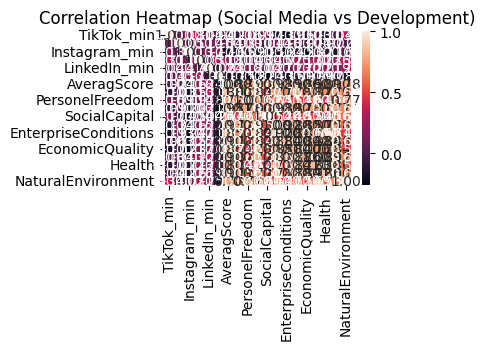

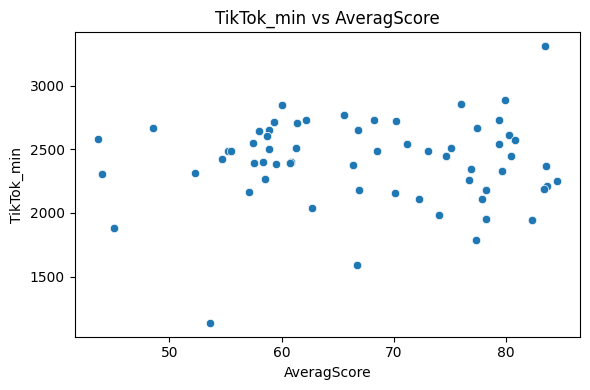

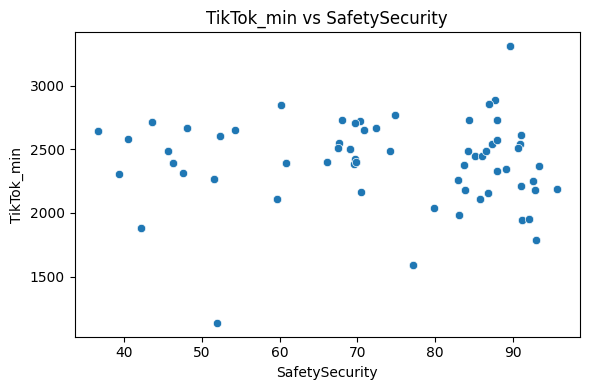

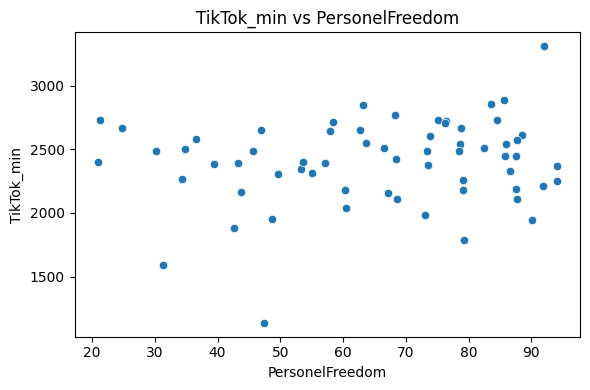

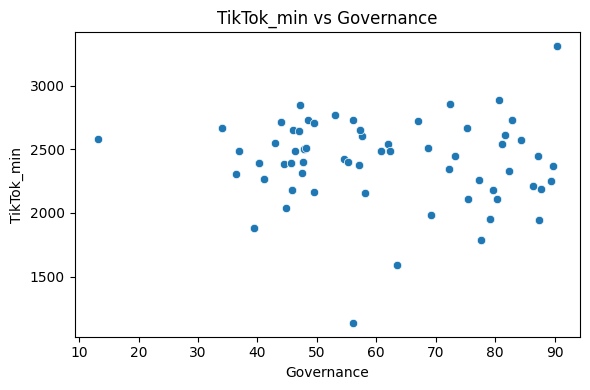

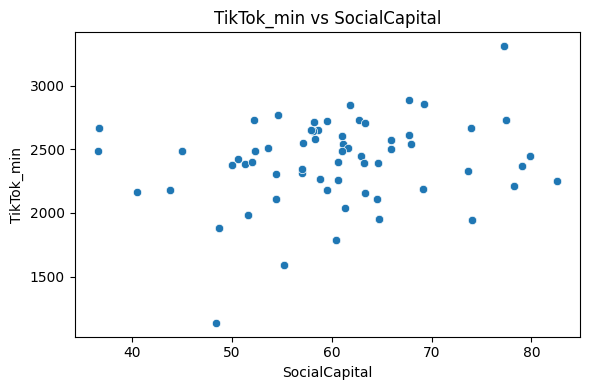

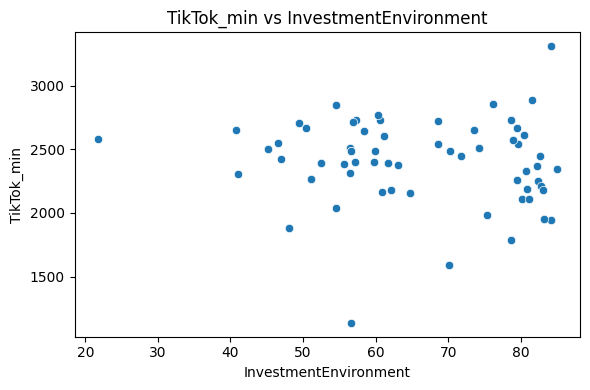

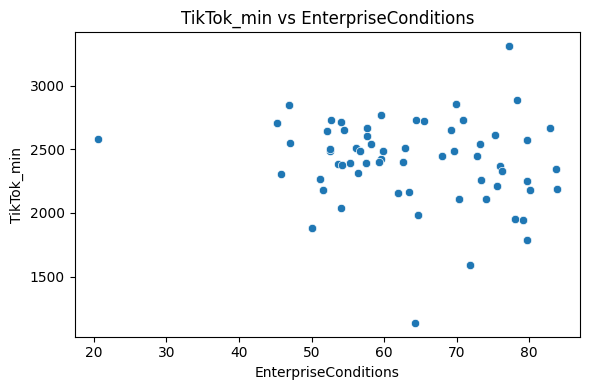

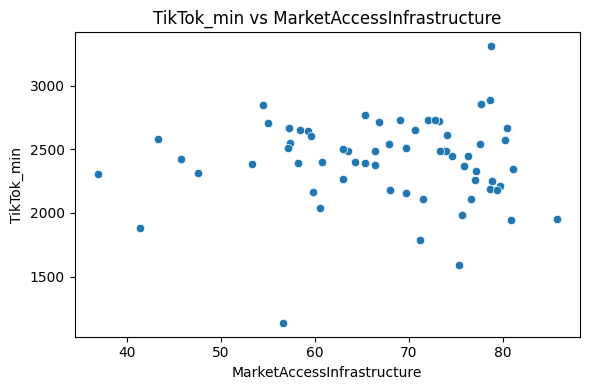

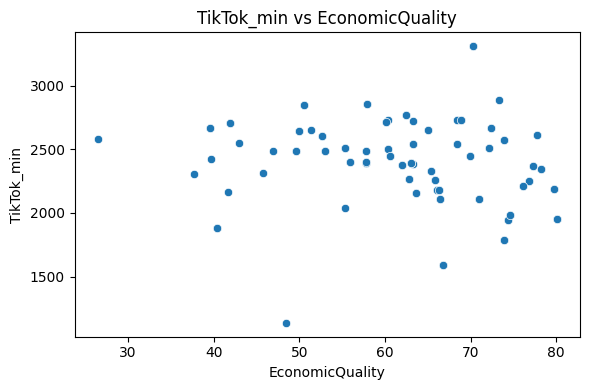

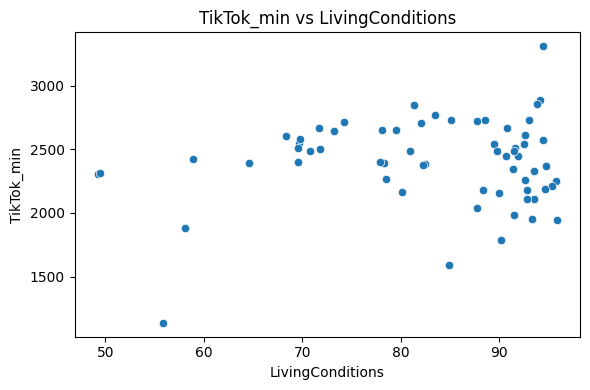

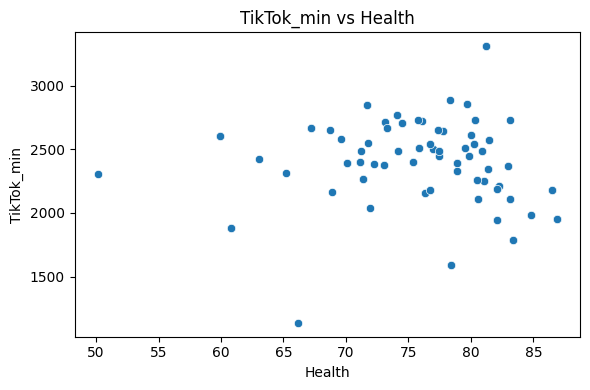

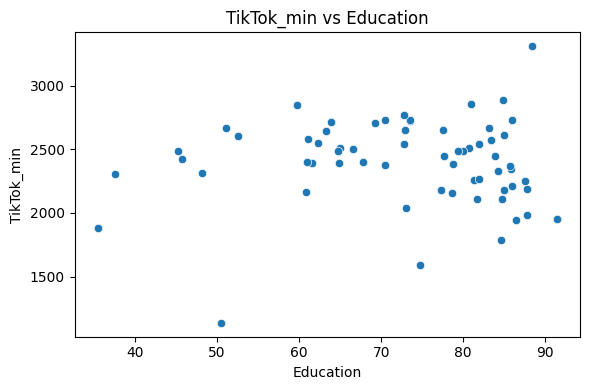

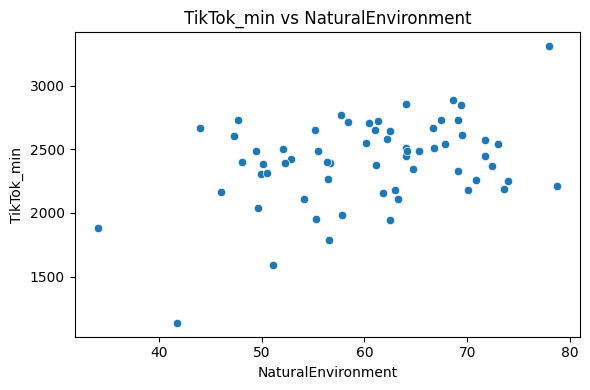

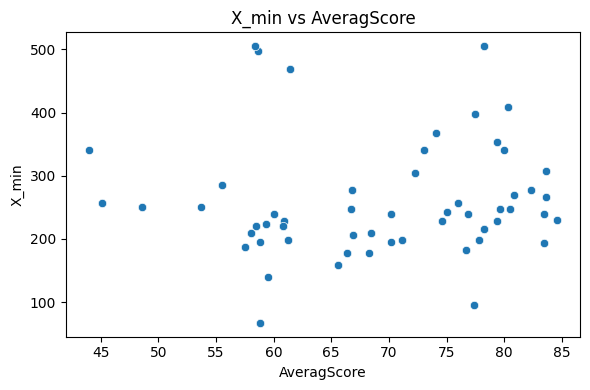

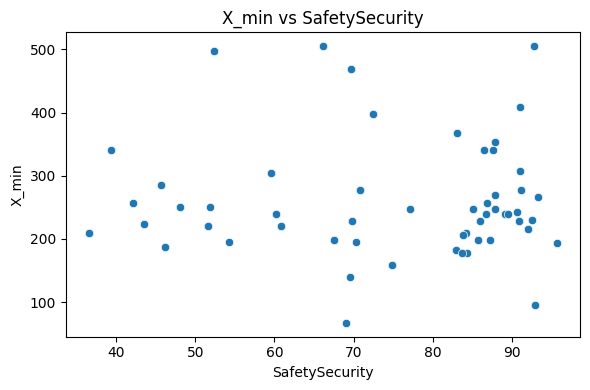

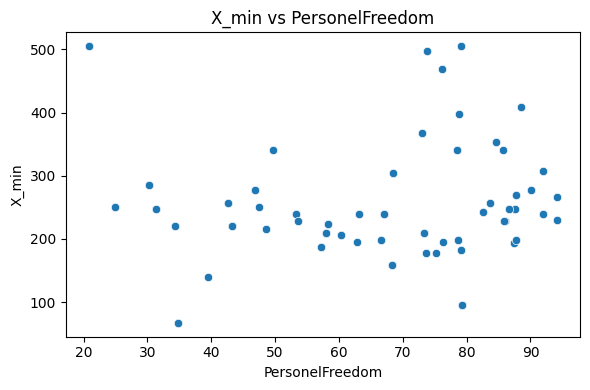

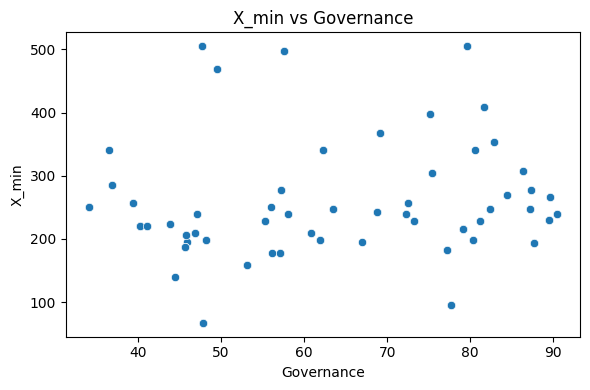

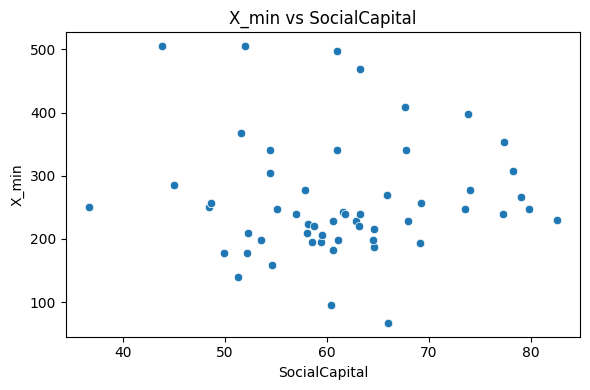

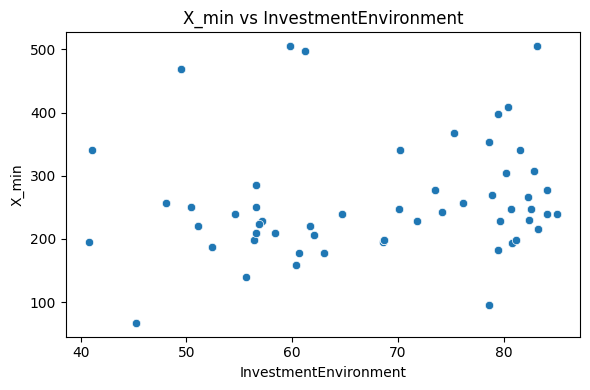

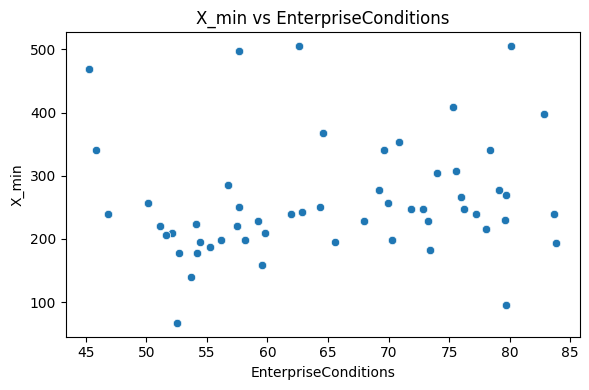

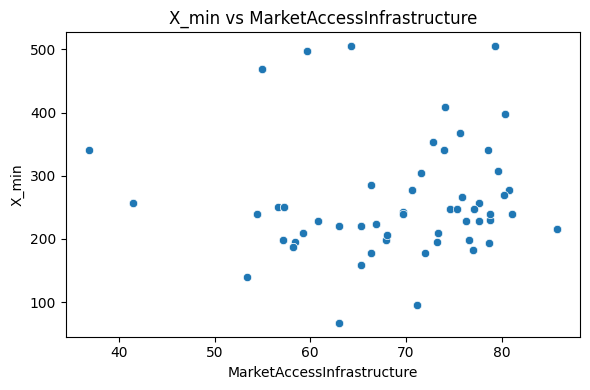

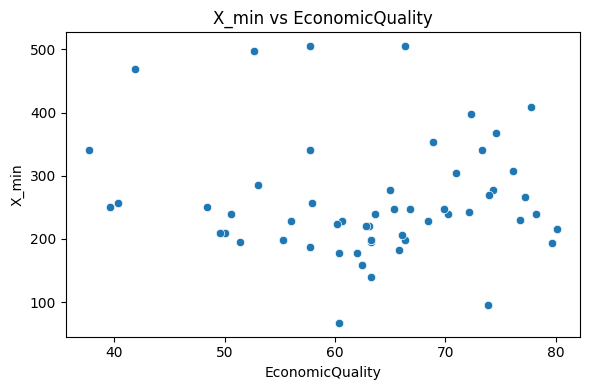

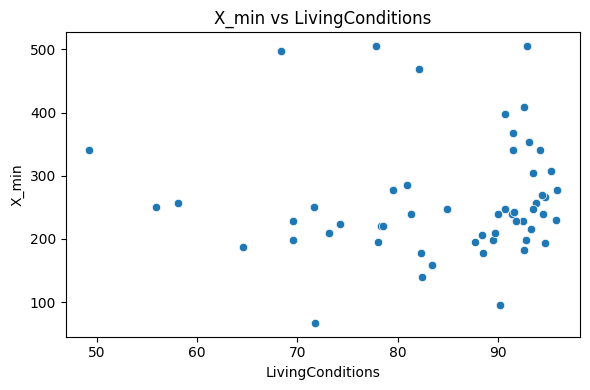

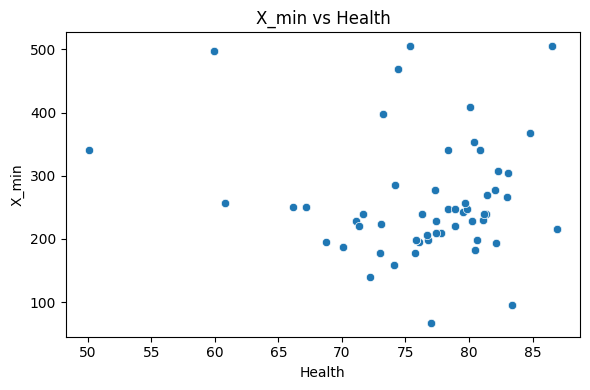

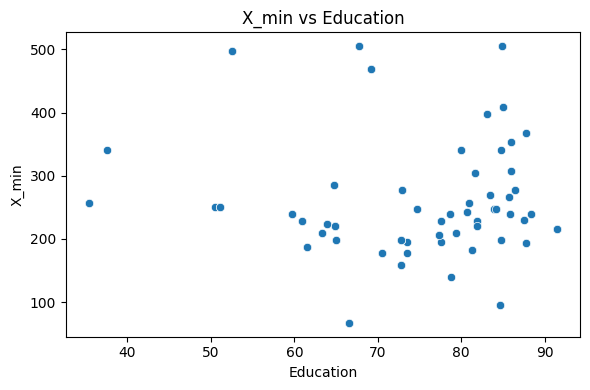

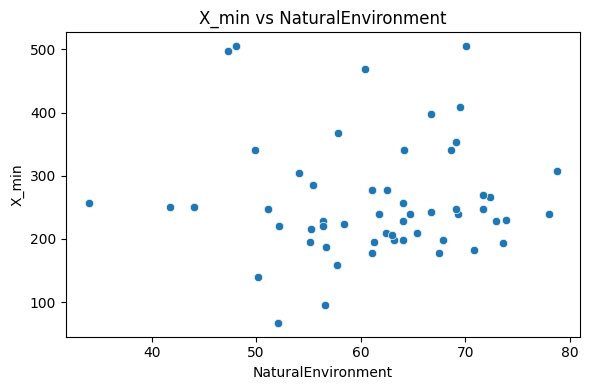

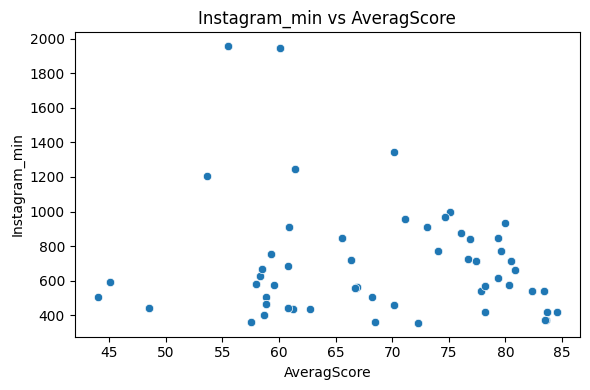

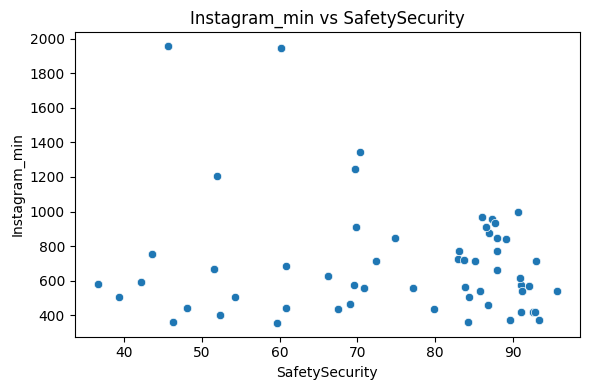

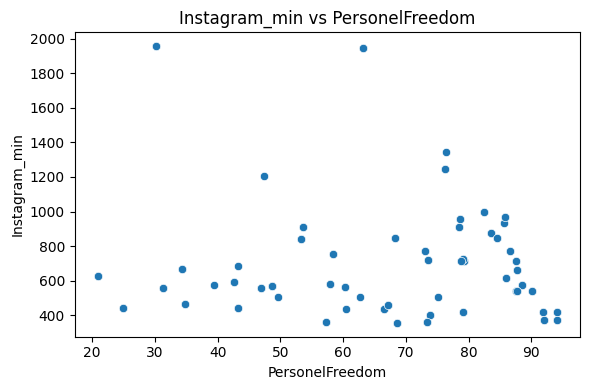

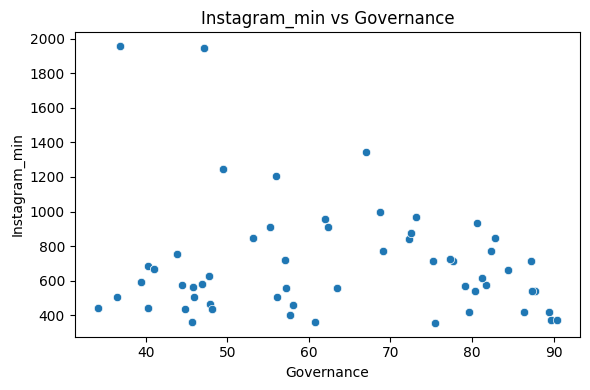

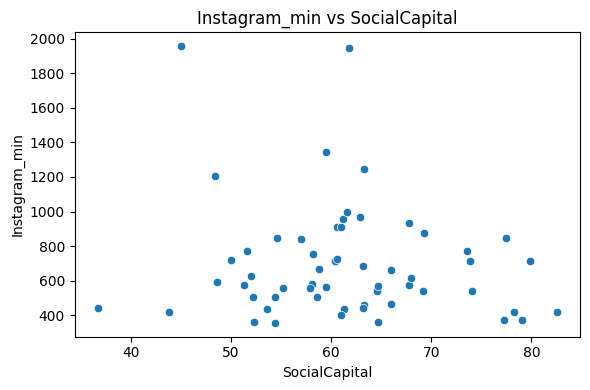

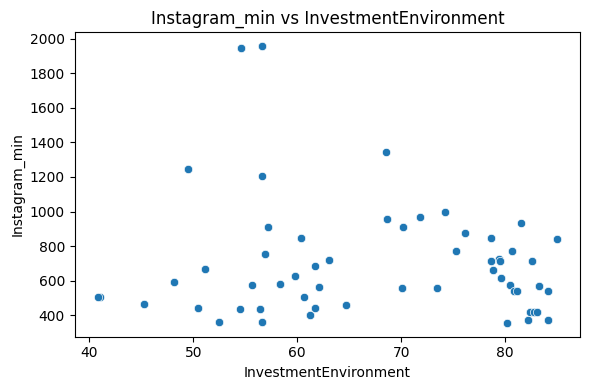

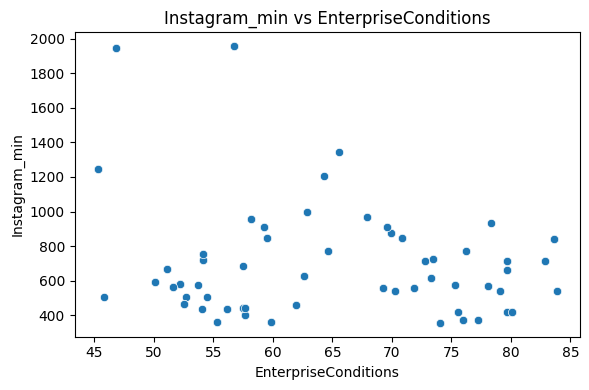

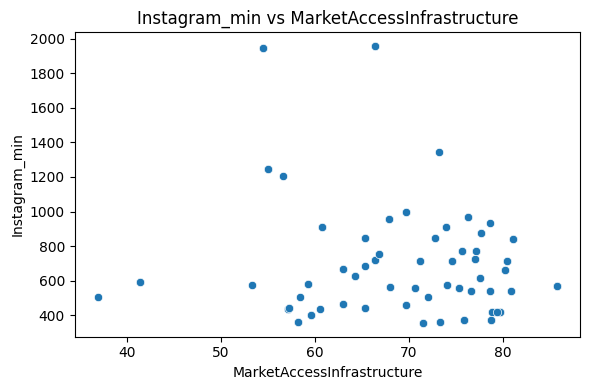

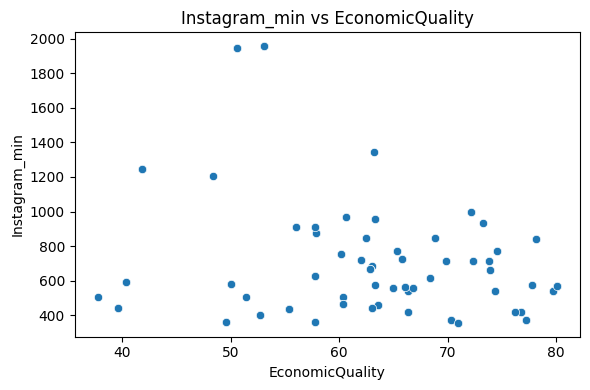

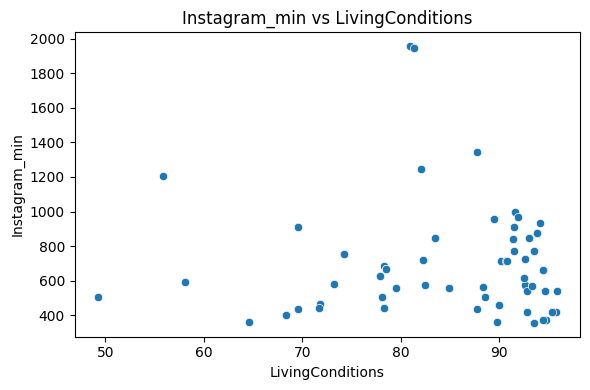

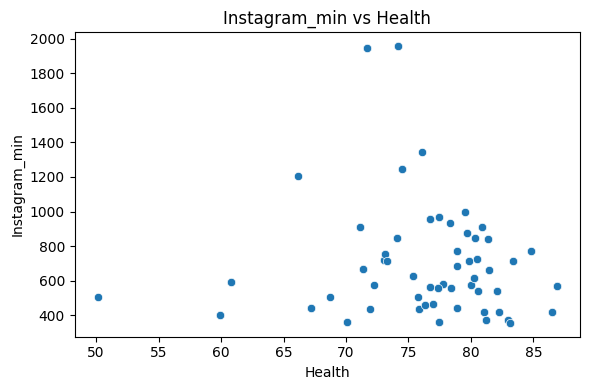

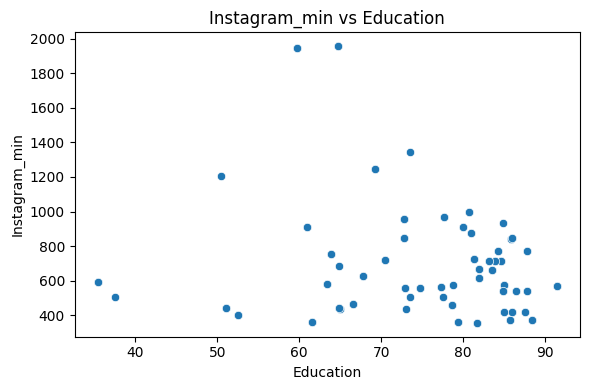

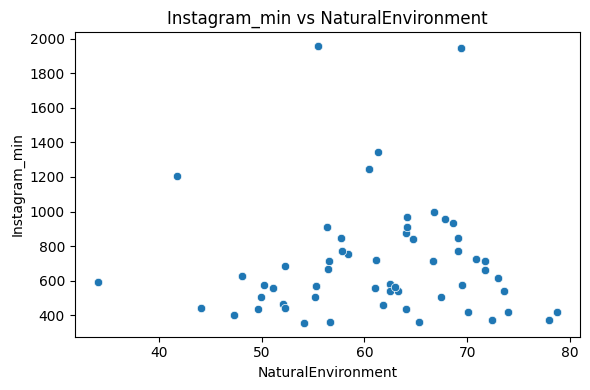

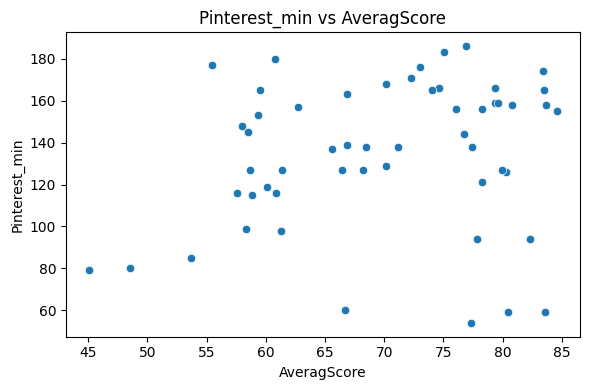

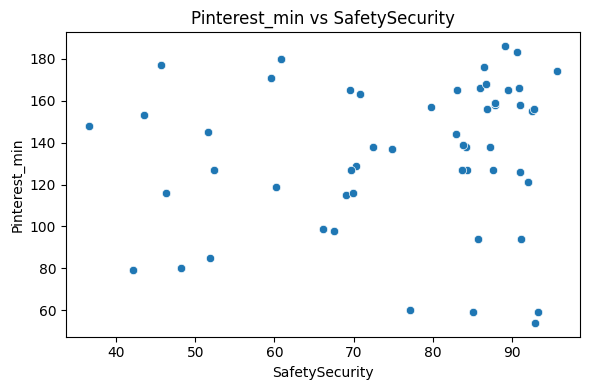

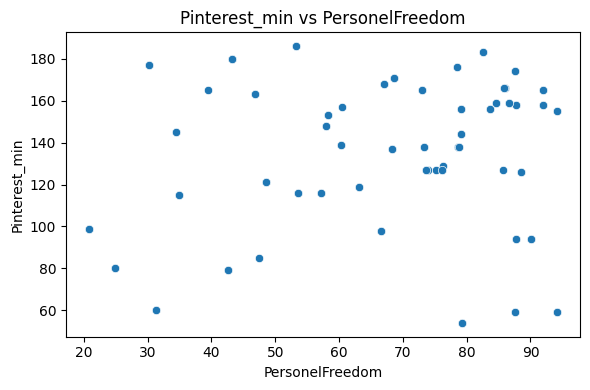

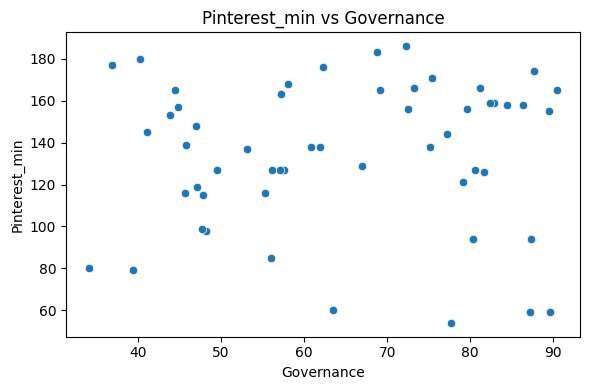

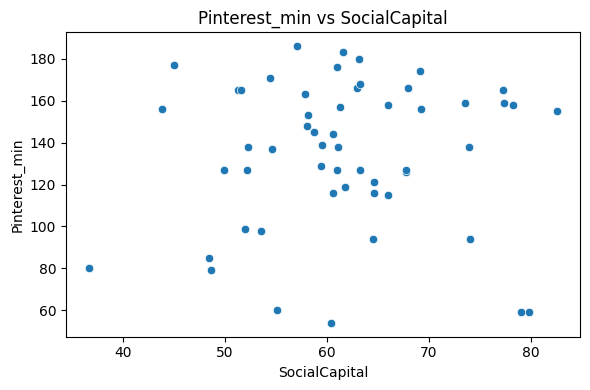

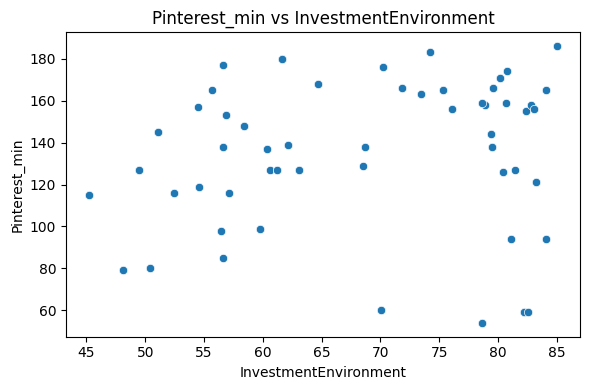

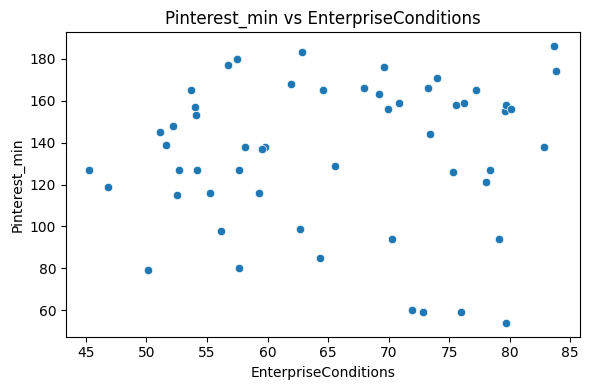

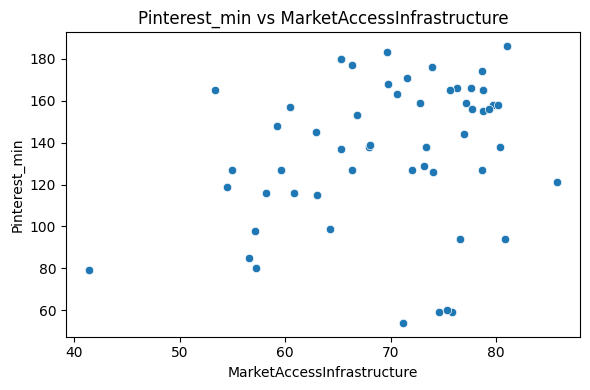

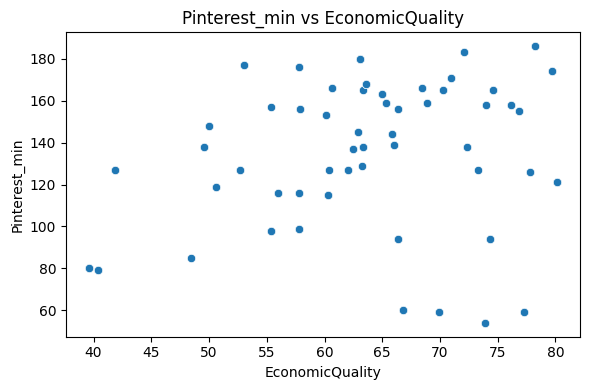

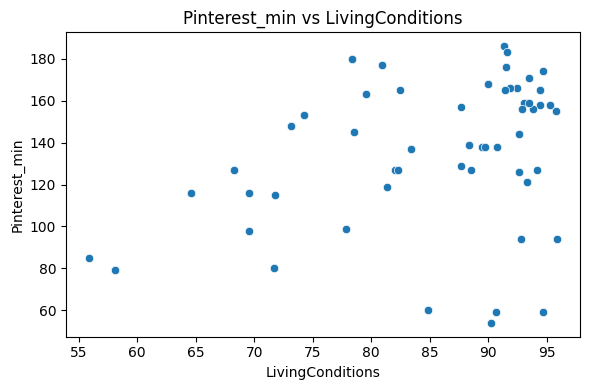

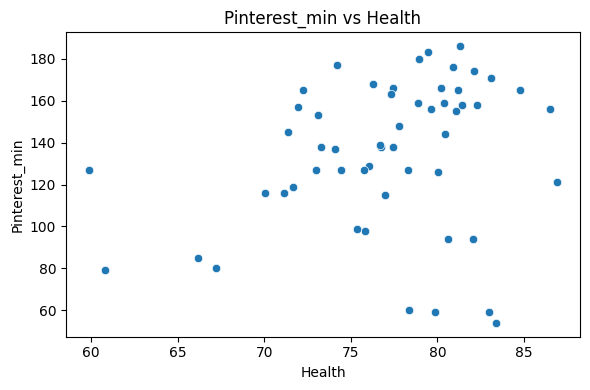

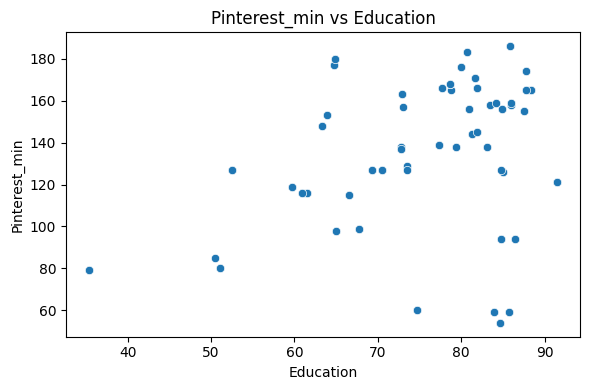

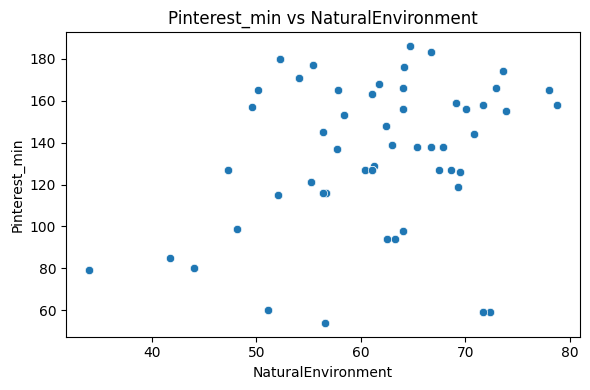

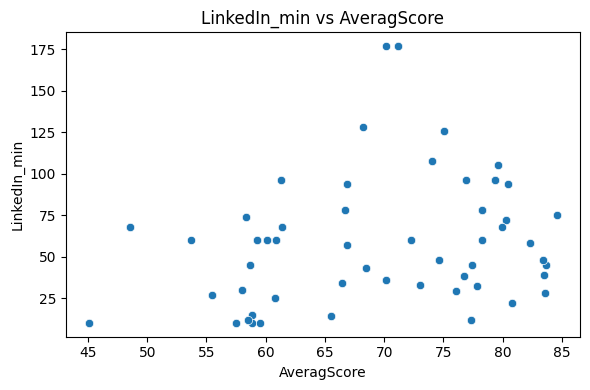

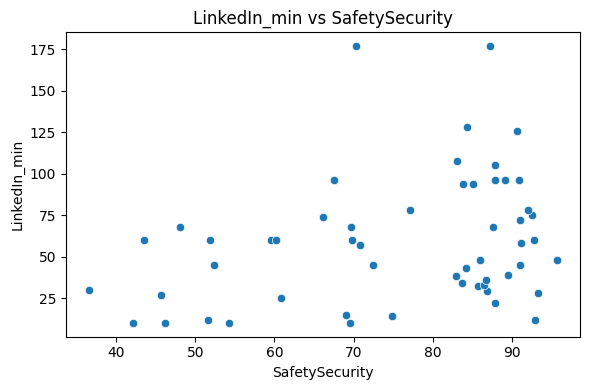

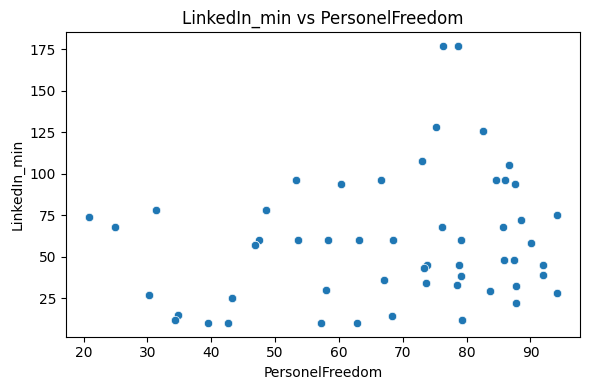

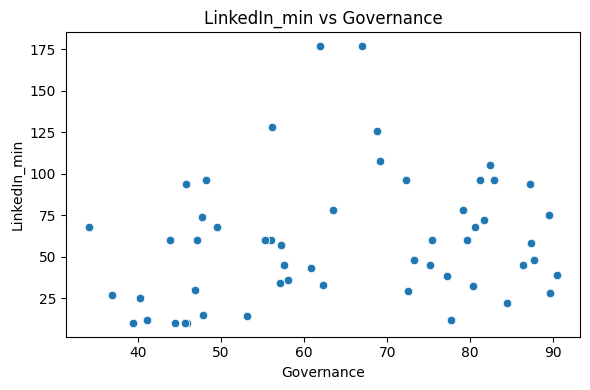

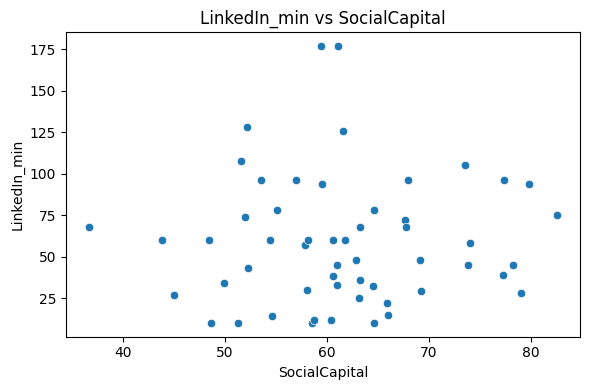

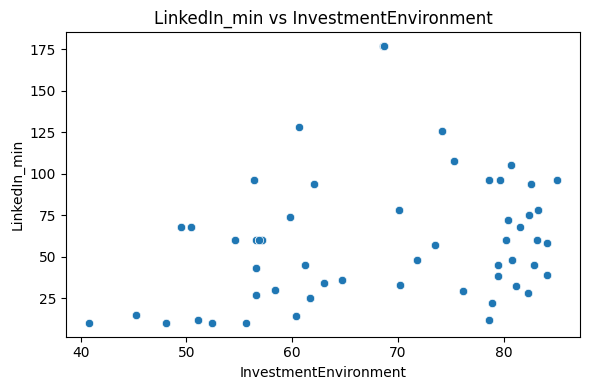

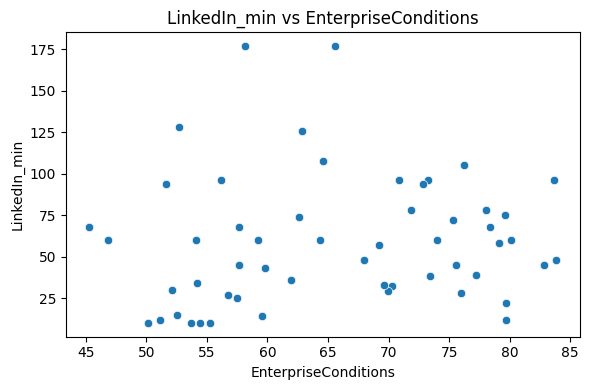

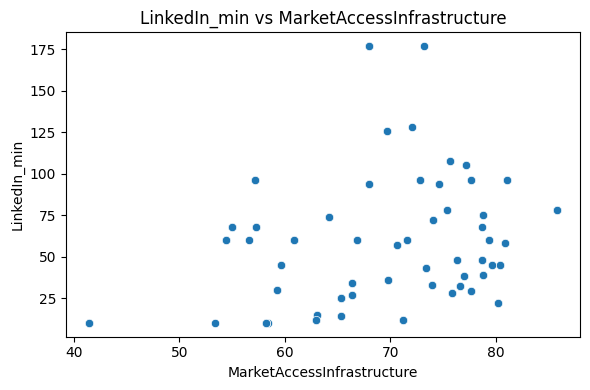

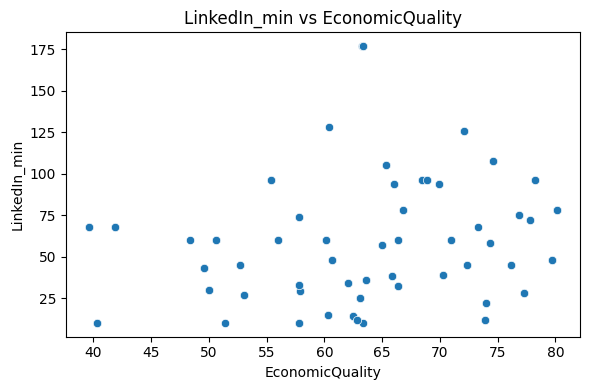

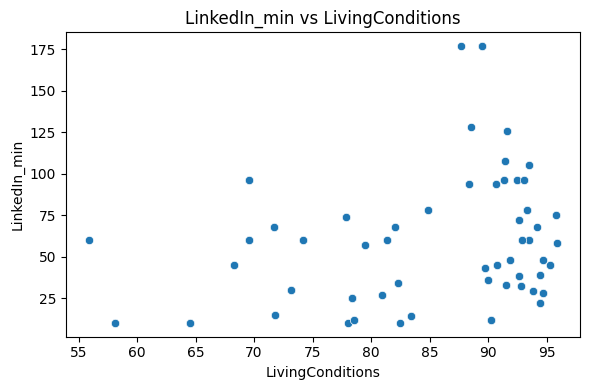

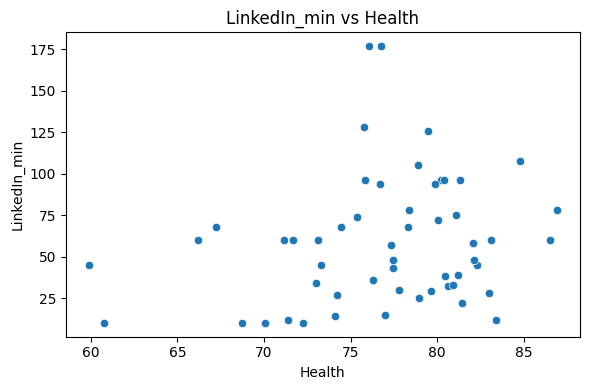

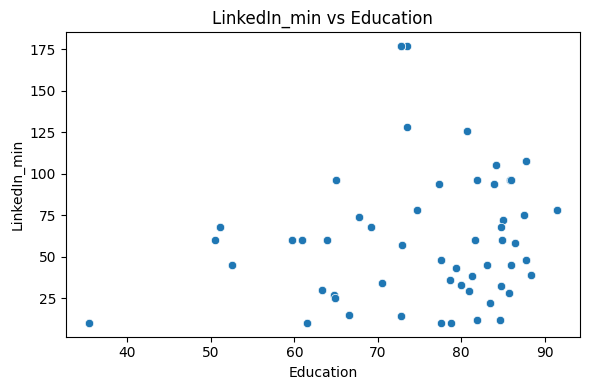

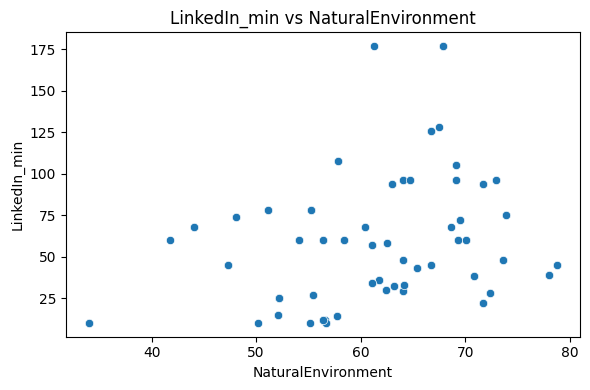

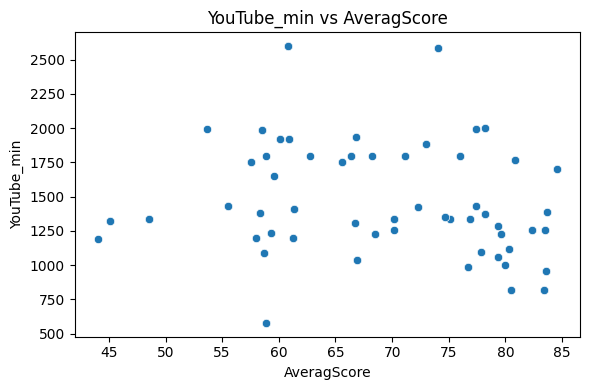

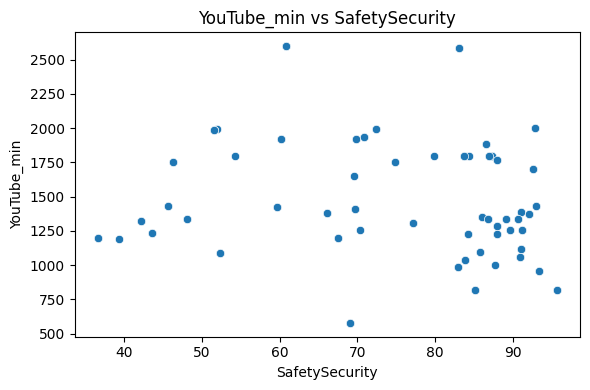

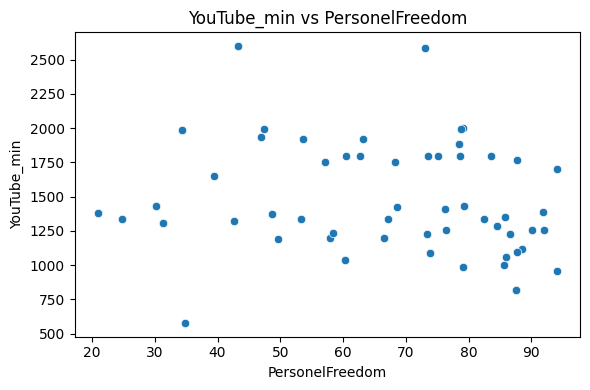

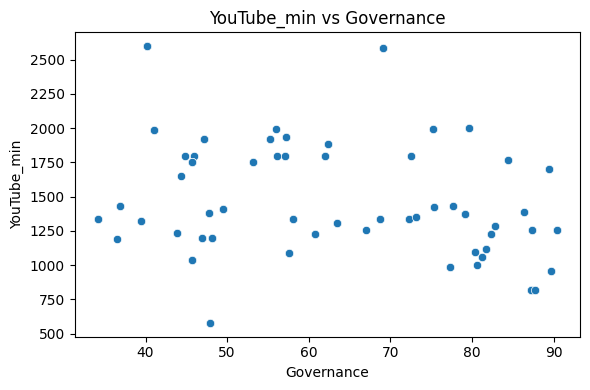

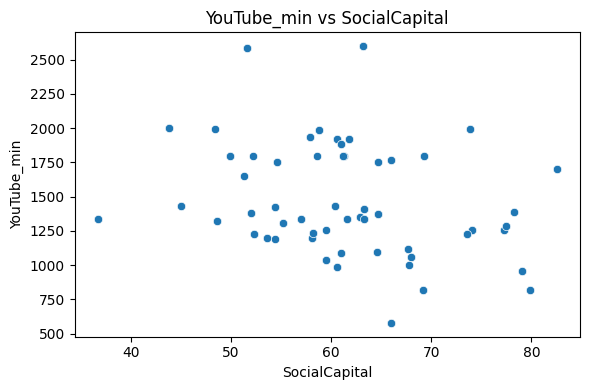

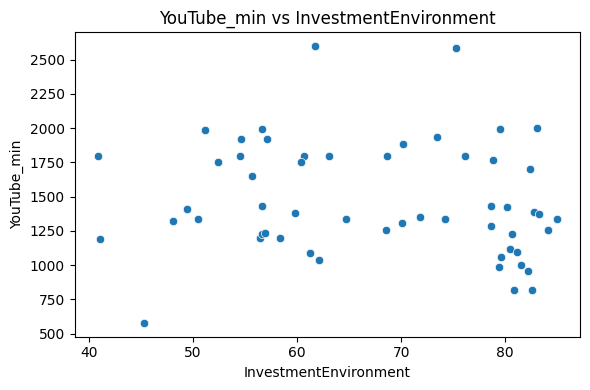

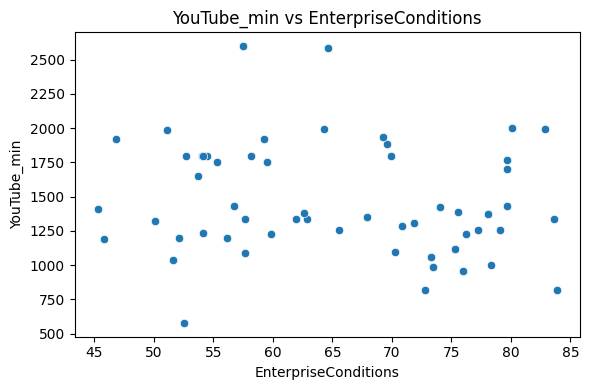

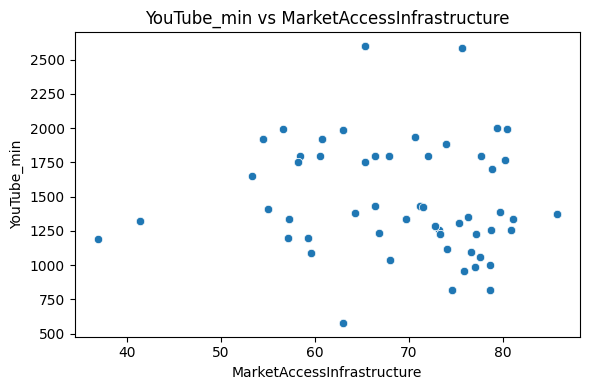

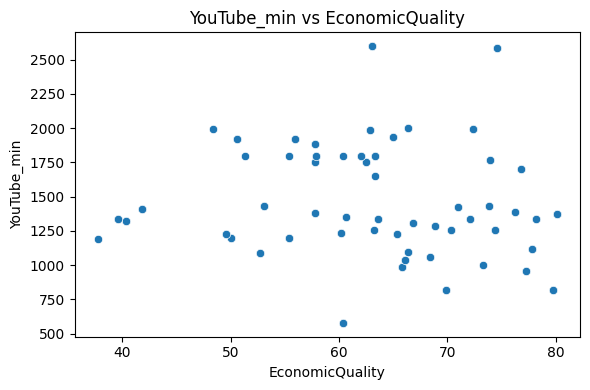

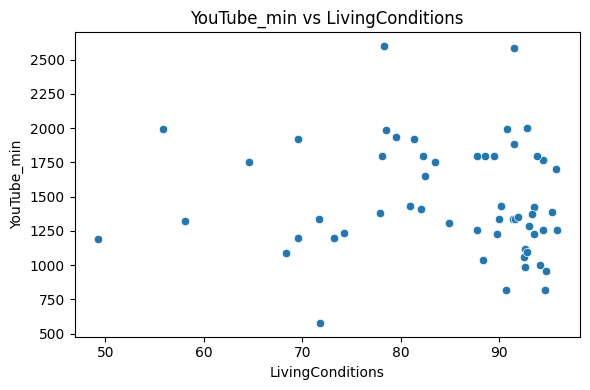

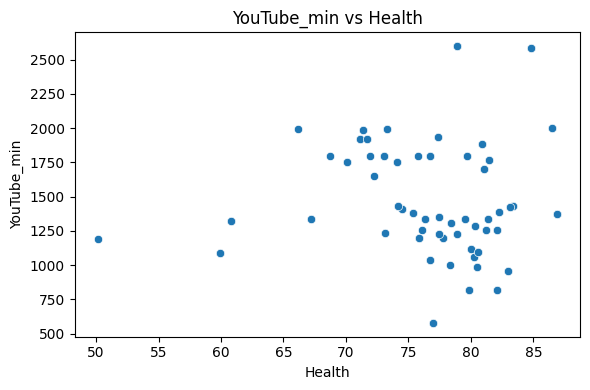

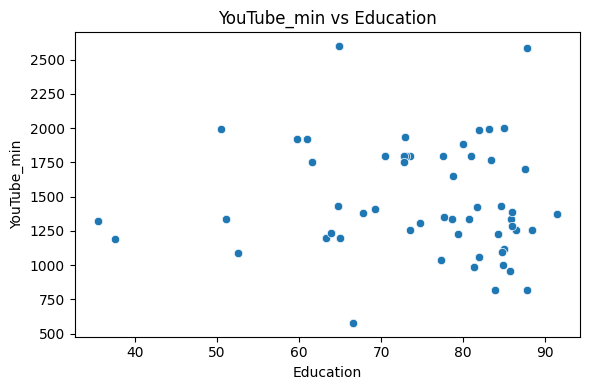

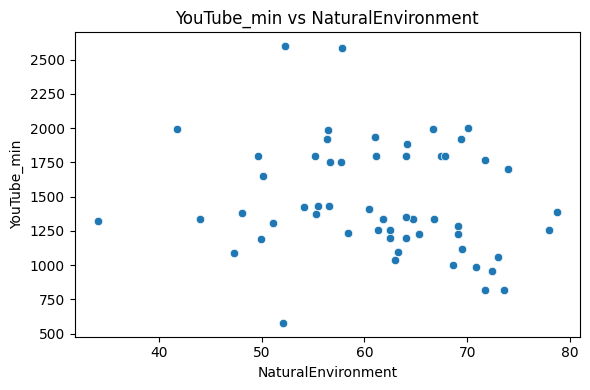

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr


monthly = pd.read_csv("monthly_time_spend_by_country.csv")
android = pd.read_csv("android_phone_use_by_country.csv")
dev = pd.read_csv("development_country.csv")


for df in [monthly, android, dev]:
    df["Country_Code"] = df["Country_Code"].astype(str).str.strip()

# Merge
df = monthly.merge(android, on="Country_Code", how="left")
df = df.merge(dev, on="Country_Code", how="left")
df.replace("-", np.nan, inplace=True)


# Sosyal medya sütunları (monthly içindeki, Country ve Country_Code hariç)
social_cols = [c for c in monthly.columns if c not in ["Country", "Country_Code"]]

# Android penetrasyon oranı (Country_Code ve Country dışındaki tek sayı sütunu)
android_rate_col = [c for c in android.columns if c not in ["Country", "Country_Code"]][0]

# Gelişmişlik göstergeleri
development_cols = dev.columns.drop(["Country", "Country_Code"], errors="ignore")

print("\nSosyal medya sütunları:", social_cols)
print("Android rate column:", android_rate_col)
print("Development indicators:", list(development_cols))


# normalized_value = original_value * (android_phone_rate / 100)
for col in social_cols:
    df[col + "_normalized"] = df[col].astype(float) * df[android_rate_col].astype(float) / 100


for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("\nNormalizasyon tamamlandı. Örnek sütunlar:")
print(df[[c for c in df.columns if "normalized" in c]].head())

print(df.head())


normalized_cols = [c for c in df.columns if c.endswith("_normalized")]

print("\n--- SUMMARY STATISTICS ---")
print(df[social_cols + list(development_cols)].describe())


plt.figure(figsize=(3,2))
sns.heatmap(df[social_cols + list(development_cols)].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Social Media vs Development)")
plt.show()


for soc in social_cols:
    for devcol in development_cols:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=devcol, y=soc)
        plt.title(f"{soc} vs {devcol}")
        plt.xlabel(devcol)
        plt.ylabel(soc)
        plt.tight_layout()
        plt.show()


In [ ]:
results = []

for soc in social_cols:
    for devcol in development_cols:

        clean = df[[soc, devcol]].dropna()

        if len(clean) > 5:  # Yeterli veri olmalı

            pearson_corr, pearson_p = pearsonr(clean[soc], clean[devcol])
            spearman_corr, spearman_p = spearmanr(clean[soc], clean[devcol])

            results.append({
                "Social_Media": soc,
                "Development": devcol,
                "Pearson_Corr": pearson_corr,
                "Pearson_p": pearson_p,
                "Spearman_Corr": spearman_corr,
                "Spearman_p": spearman_p
            })

results_df = pd.DataFrame(results)
print("\n--- Hypothesis Test Results ---")
print(results_df.sort_values("Pearson_p"))



--- Hypothesis Test Results ---
     Social_Media         Development  Pearson_Corr  Pearson_p  Spearman_Corr  \
12     TikTok_min  NaturalEnvironment      0.342322   0.000206       0.204738   
53   LinkedIn_min      SafetySecurity      0.313084   0.001212       0.282898   
51  Pinterest_min  NaturalEnvironment      0.307564   0.001493       0.250015   
48  Pinterest_min    LivingConditions      0.299391   0.002019       0.279283   
68    YouTube_min          Governance     -0.265316   0.005984      -0.284480   
..            ...                 ...           ...        ...            ...   
35  Instagram_min    LivingConditions     -0.023461   0.811327      -0.080400   
0      TikTok_min         AveragScore     -0.019354   0.838768      -0.113628   
75    YouTube_min              Health     -0.019813   0.840241      -0.123832   
24          X_min           Education     -0.015876   0.872296       0.126137   
25          X_min  NaturalEnvironment     -0.004787   0.961343       0.05165

In [ ]:
significant = results_df[(results_df["Pearson_p"] < 0.05) | (results_df["Spearman_p"] < 0.05)]
print("\n--- SIGNIFICANT RELATIONSHIPS (p < 0.05) ---")
print(significant)



--- SIGNIFICANT RELATIONSHIPS (p < 0.05) ---
     Social_Media                 Development  Pearson_Corr  Pearson_p  \
1      TikTok_min              SafetySecurity     -0.097740   0.303056   
5      TikTok_min       InvestmentEnvironment     -0.127263   0.179192   
6      TikTok_min        EnterpriseConditions     -0.187762   0.046426   
7      TikTok_min  MarketAccessInfrastructure     -0.062250   0.512466   
8      TikTok_min             EconomicQuality     -0.169746   0.072268   
10     TikTok_min                      Health     -0.097843   0.302542   
11     TikTok_min                   Education     -0.042382   0.655800   
12     TikTok_min          NaturalEnvironment      0.342322   0.000206   
16          X_min                  Governance      0.102104   0.299994   
18          X_min       InvestmentEnvironment      0.135909   0.166846   
19          X_min        EnterpriseConditions      0.125126   0.203439   
29  Instagram_min                  Governance     -0.202655   0.03


Normalized columns: ['TikTok_min_normalized', 'X_min_normalized', 'Instagram_min_normalized', 'Pinterest_min_normalized', 'LinkedIn_min_normalized', 'YouTube_min_normalized']

--- SUMMARY STATISTICS (Normalized) ---
       TikTok_min_normalized  X_min_normalized  Instagram_min_normalized  \
count             113.000000        105.000000                106.000000   
mean             1663.840209        176.597336                485.796840   
std               456.500348         75.370487                301.131458   
min               720.161100         38.199500                124.237500   
25%              1365.873600        135.618200                321.300000   
50%              1708.758400        164.815000                391.530900   
75%              1988.792400        210.611300                562.940400   
max              2566.710000        417.523200               1756.265000   

       Pinterest_min_normalized  LinkedIn_min_normalized  \
count                104.000000       

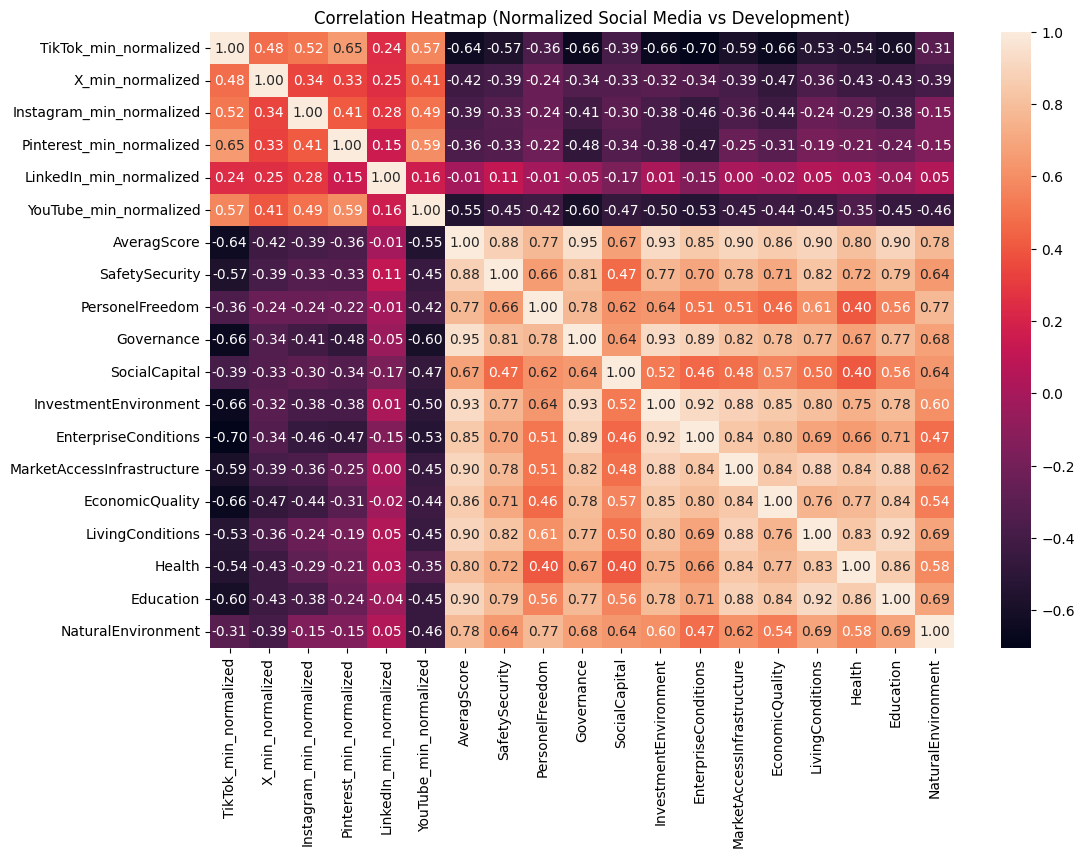

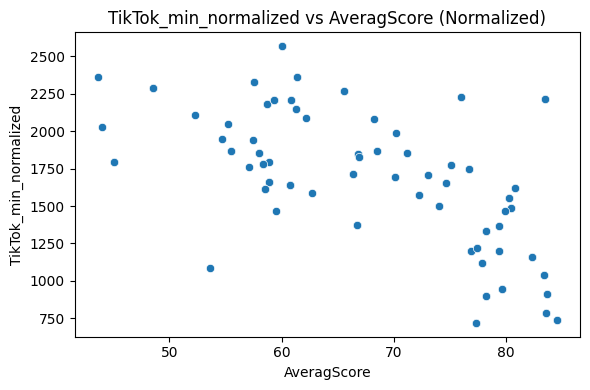

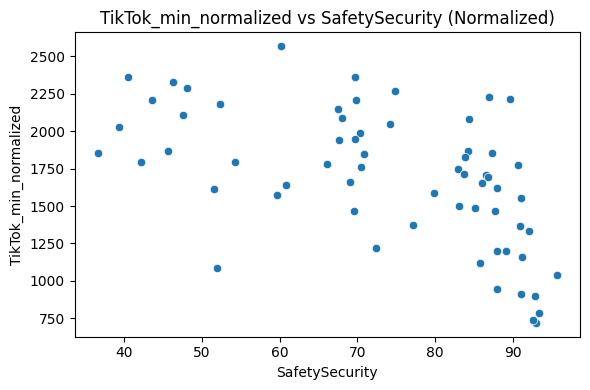

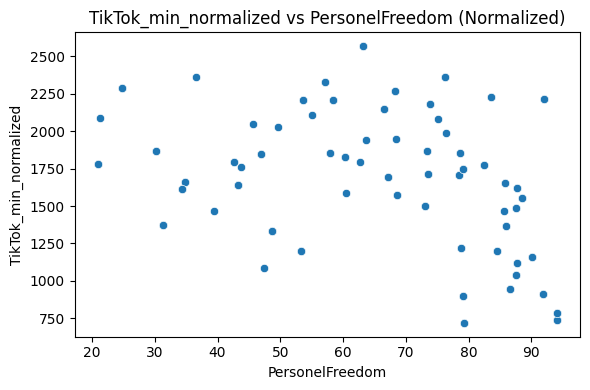

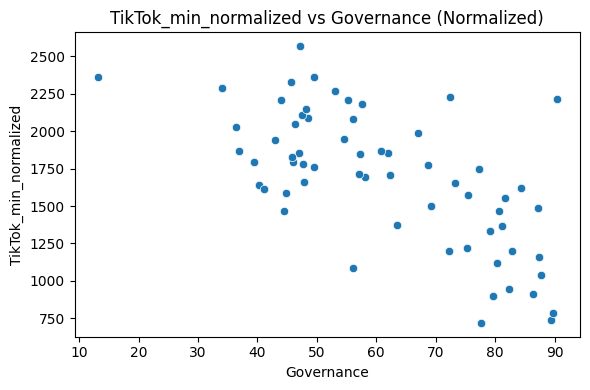

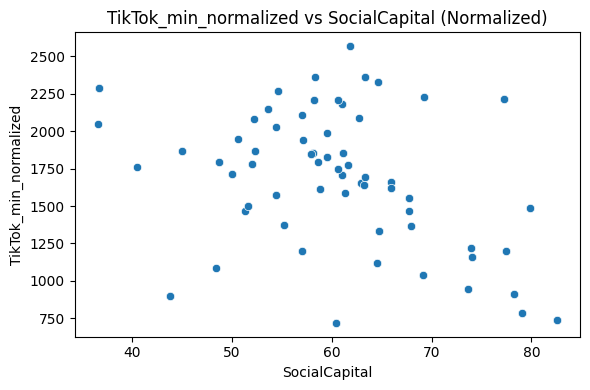

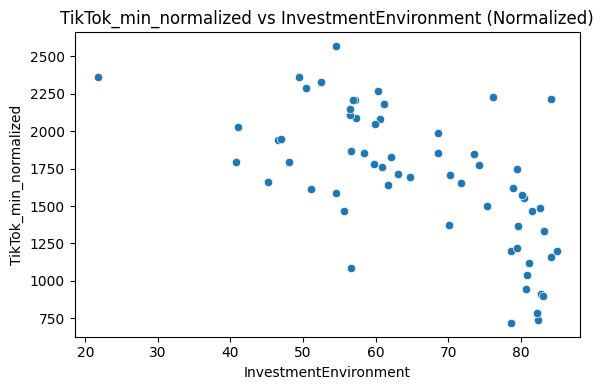

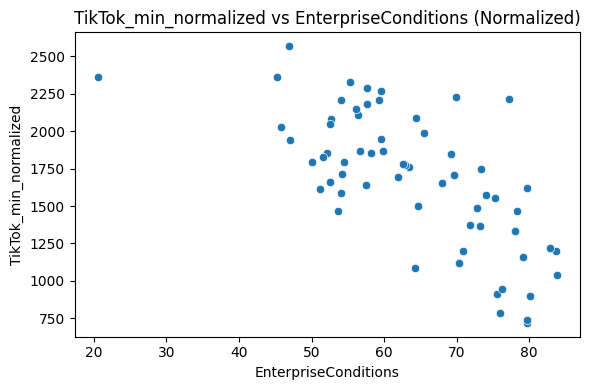

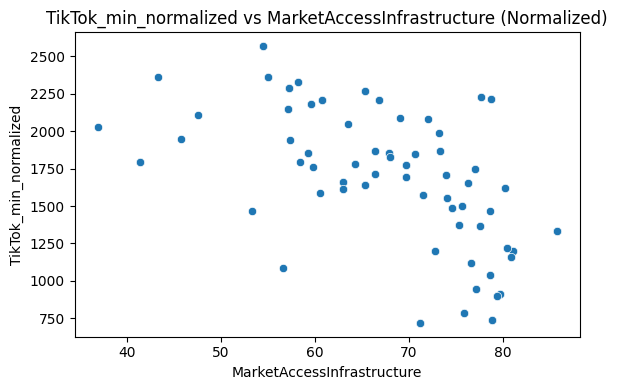

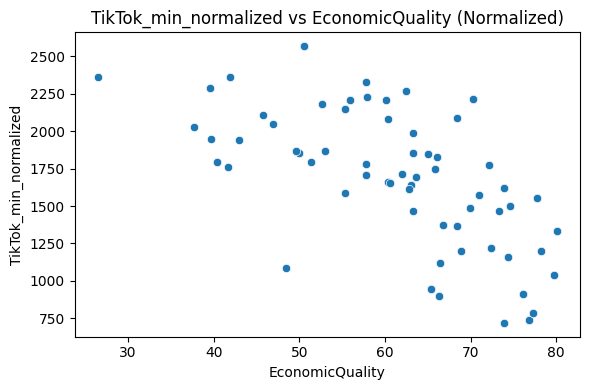

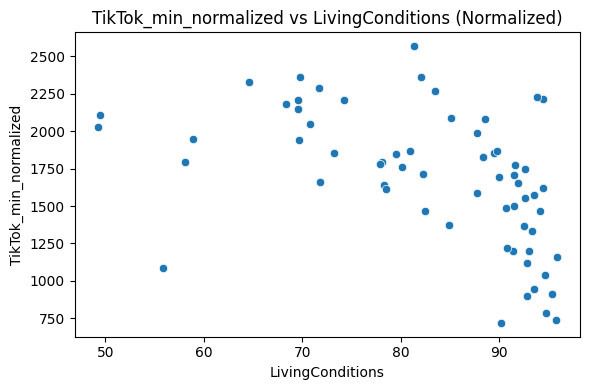

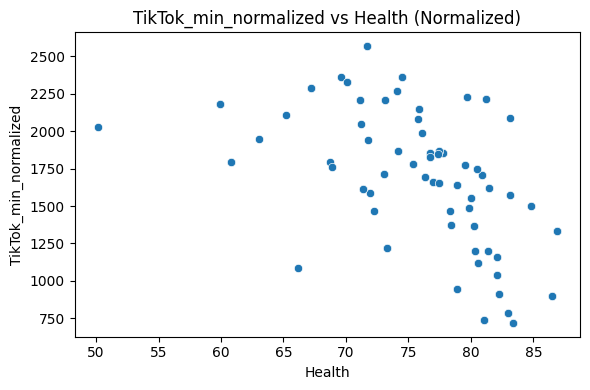

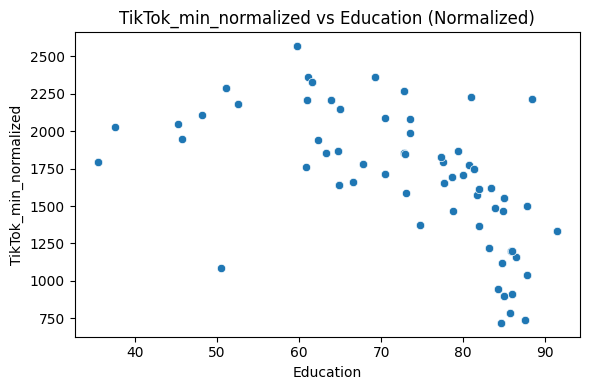

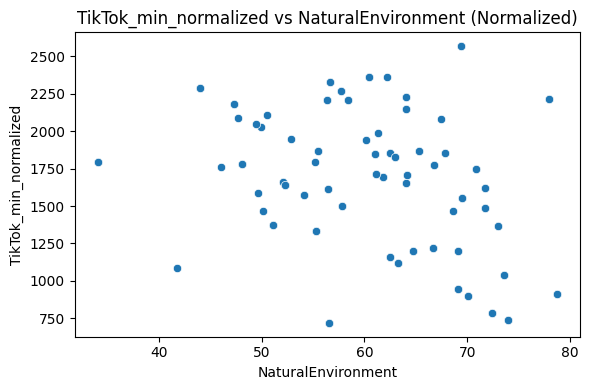

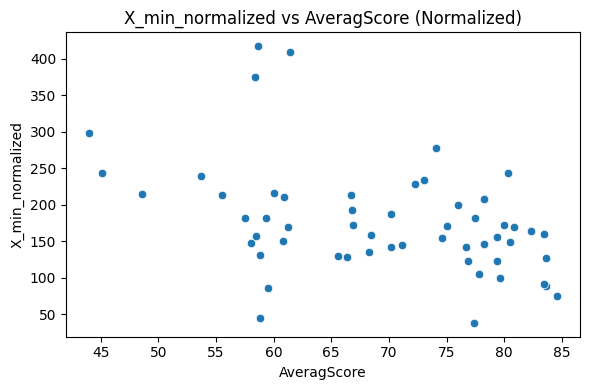

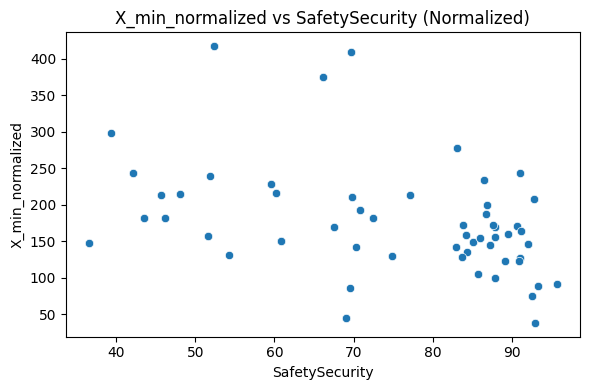

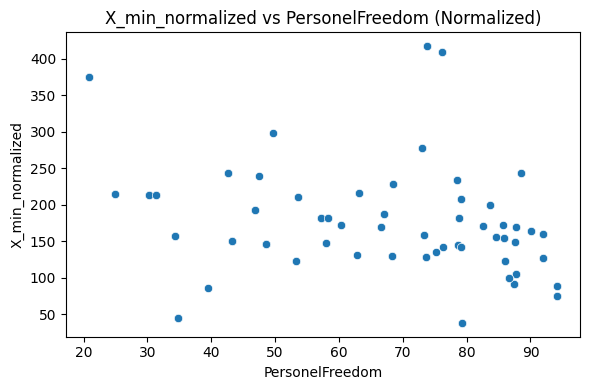

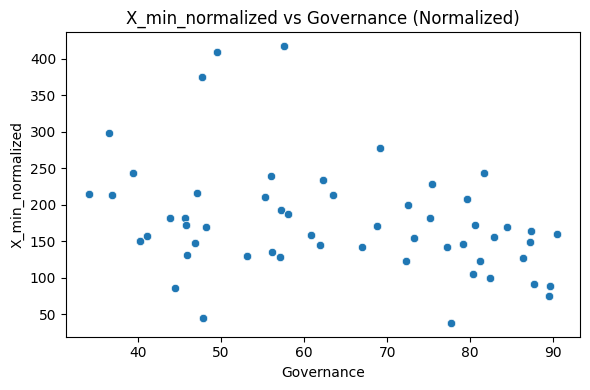

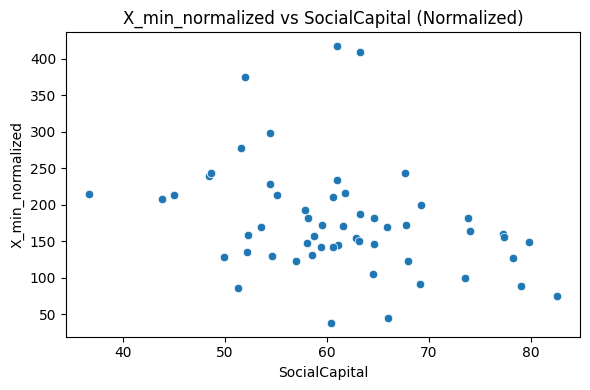

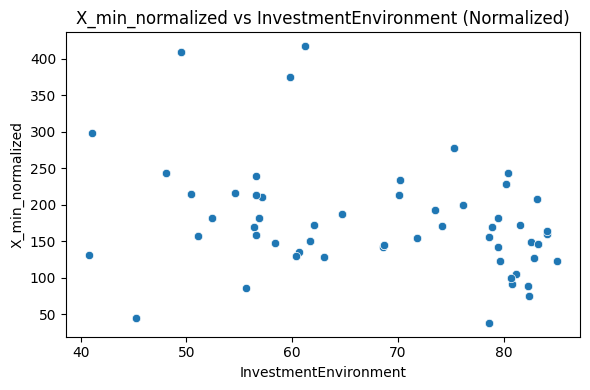

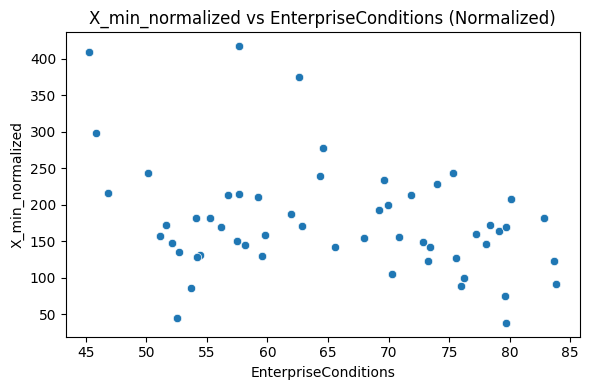

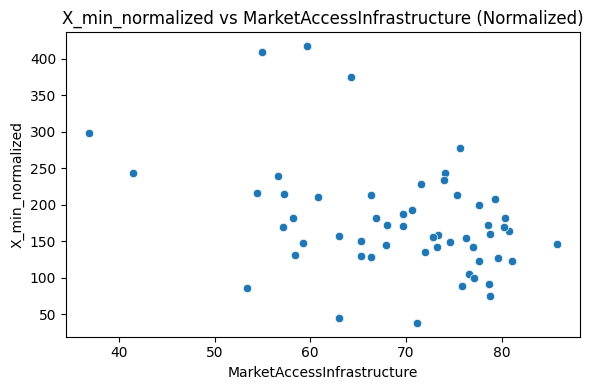

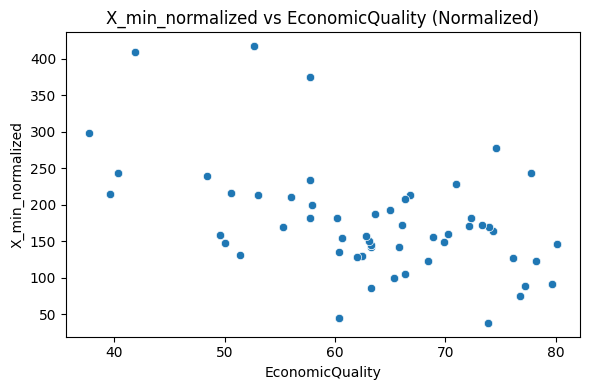

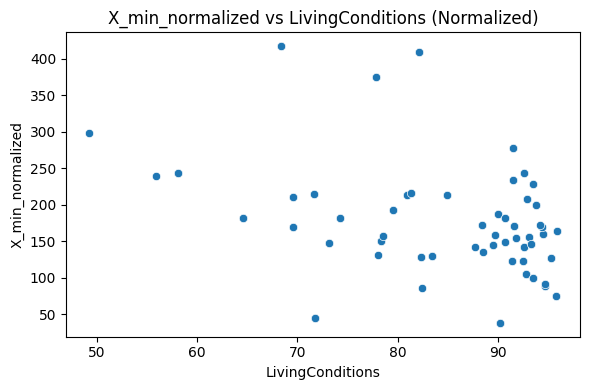

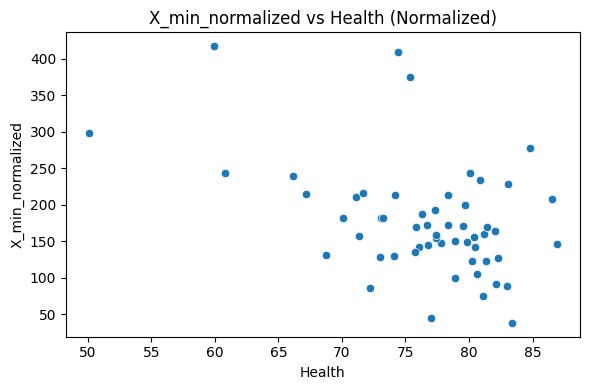

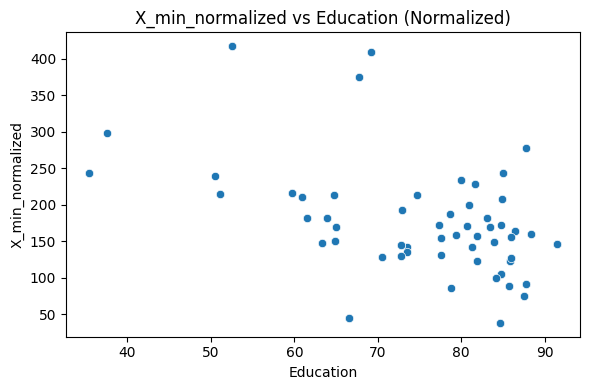

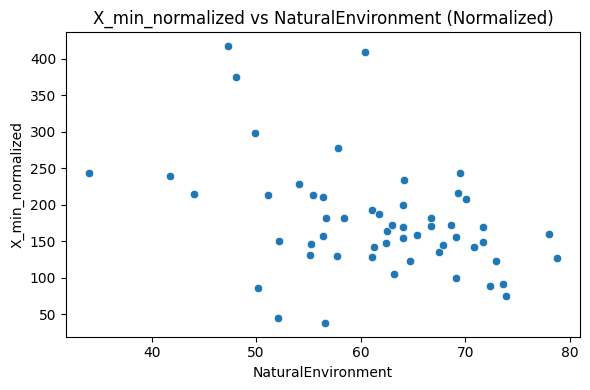

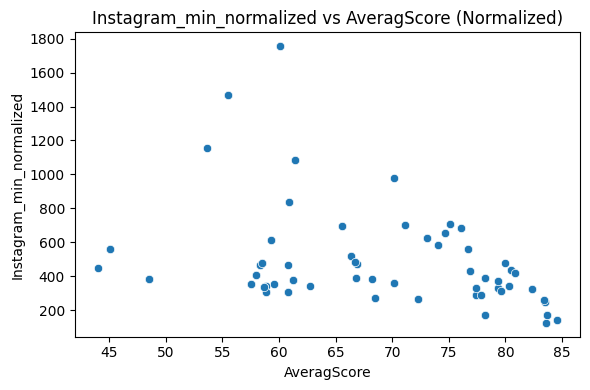

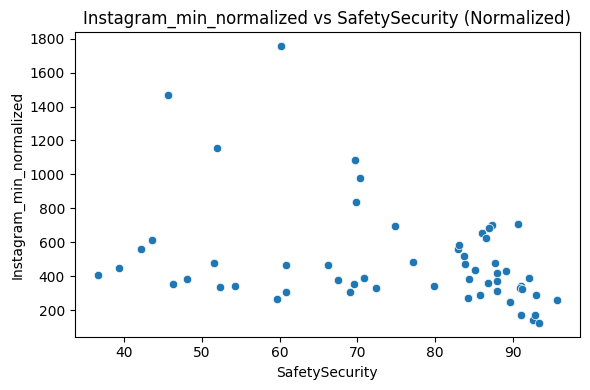

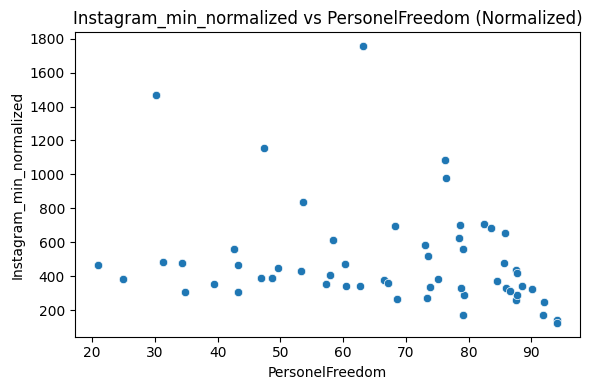

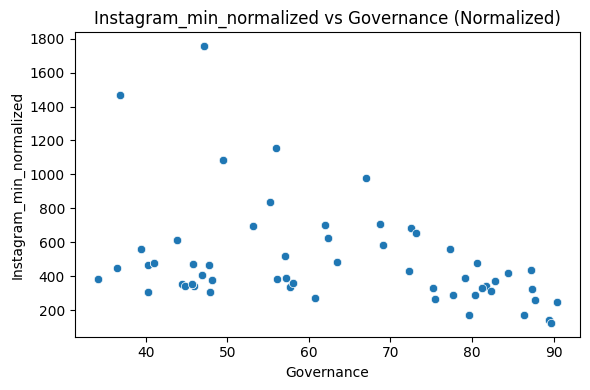

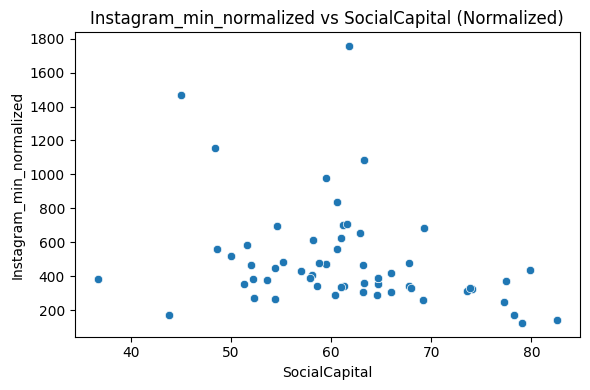

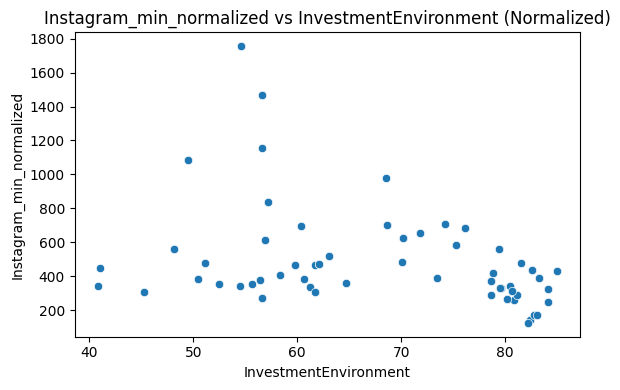

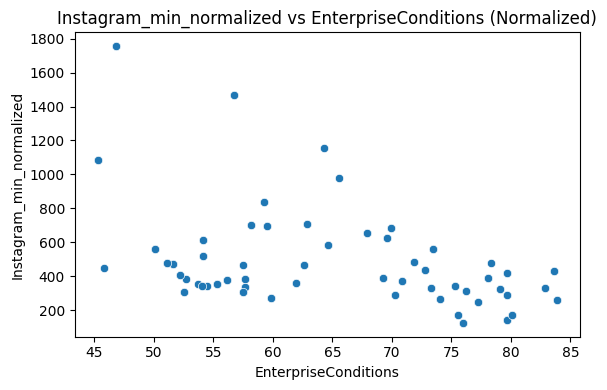

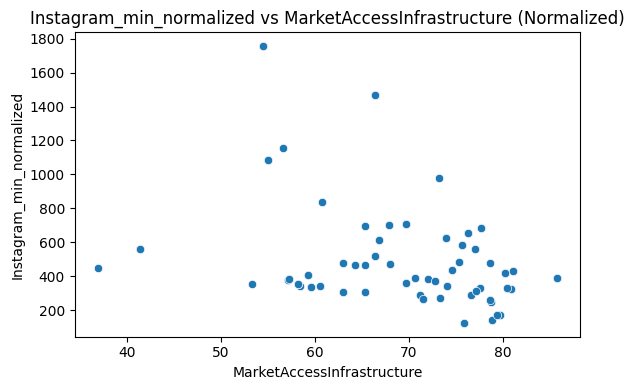

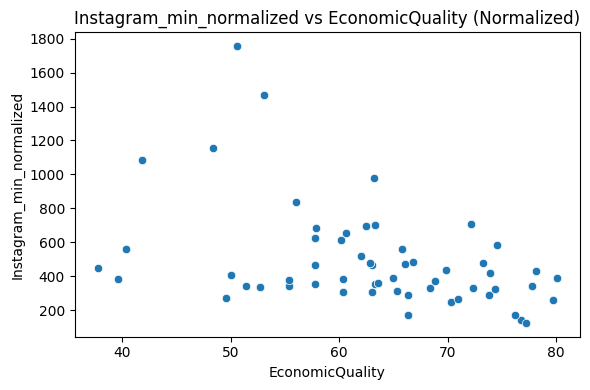

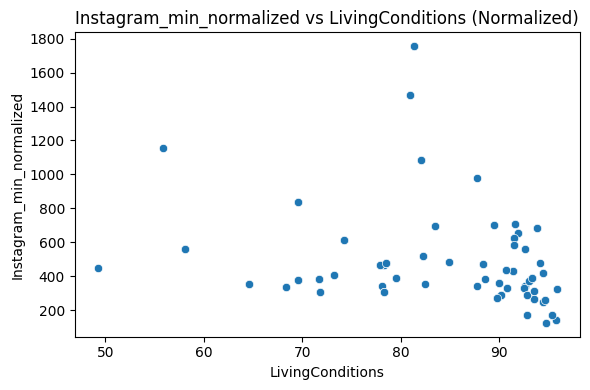

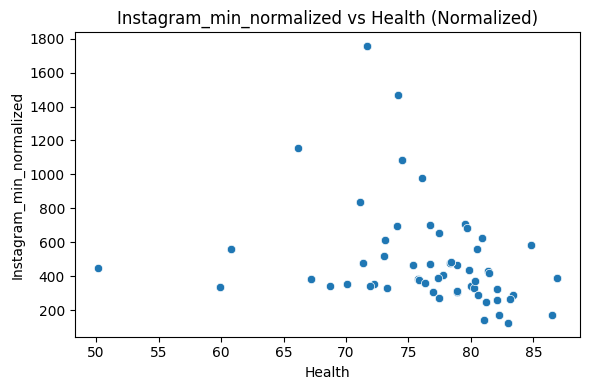

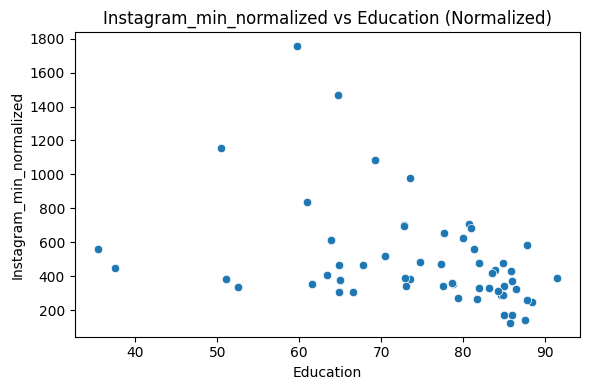

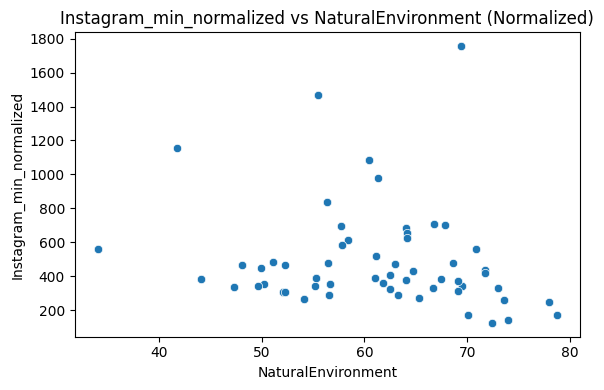

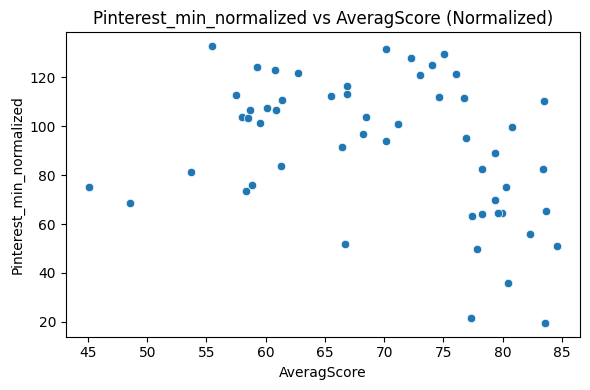

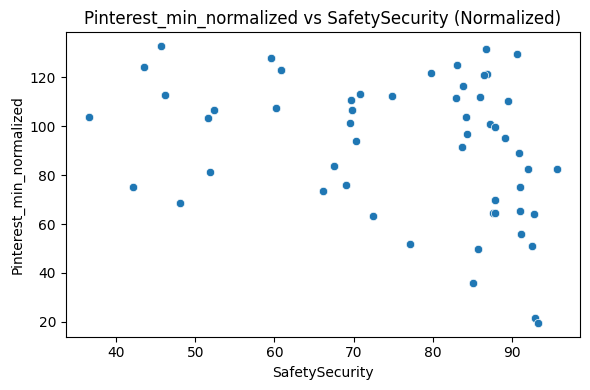

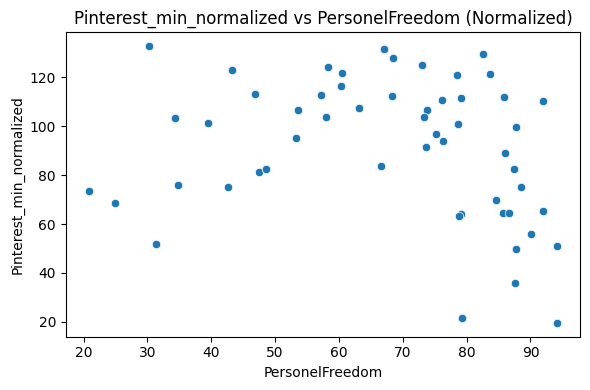

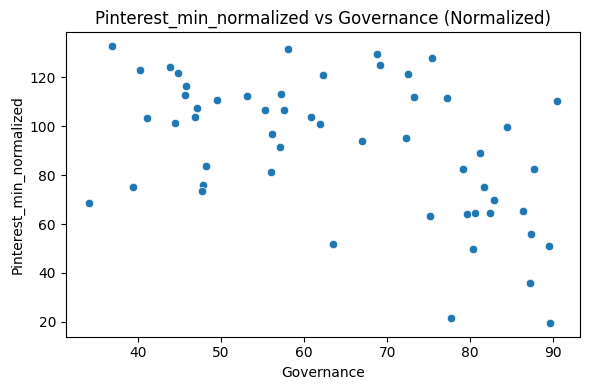

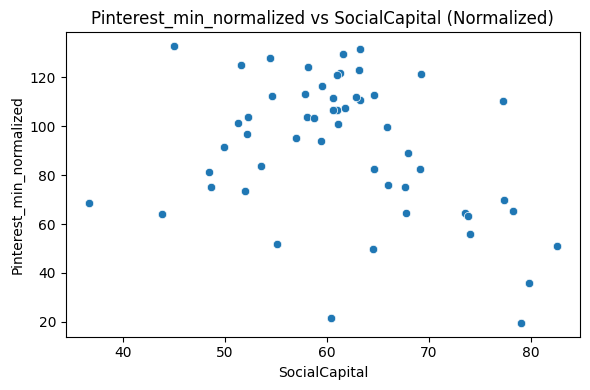

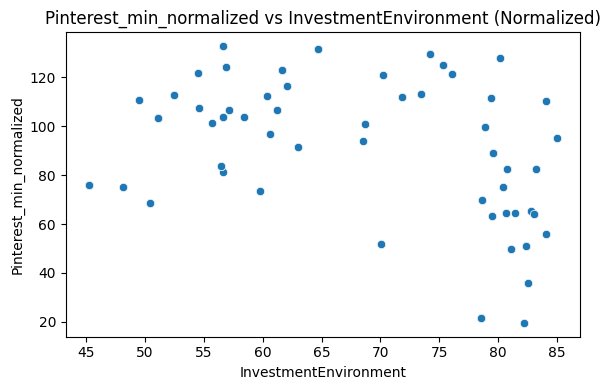

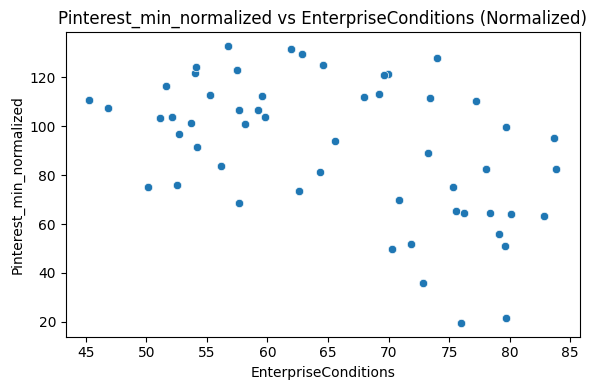

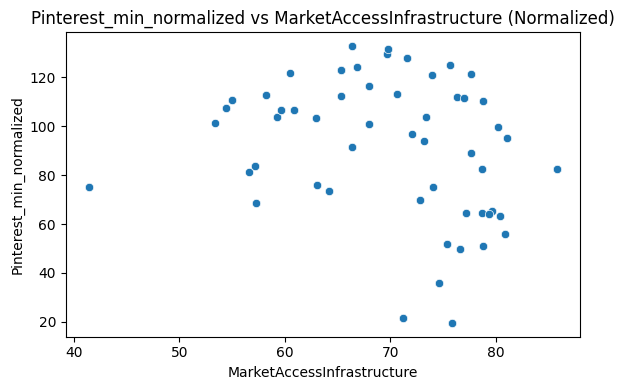

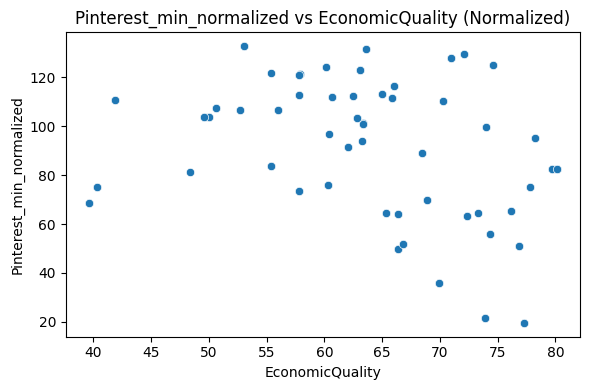

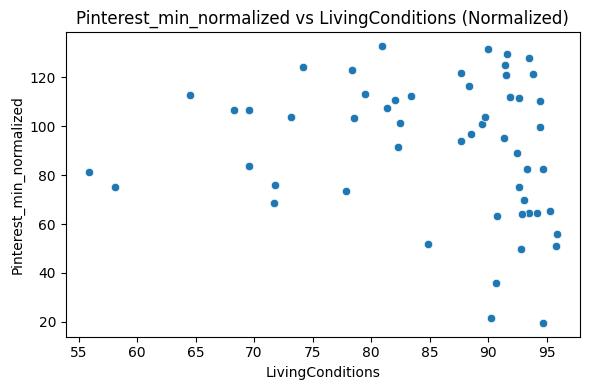

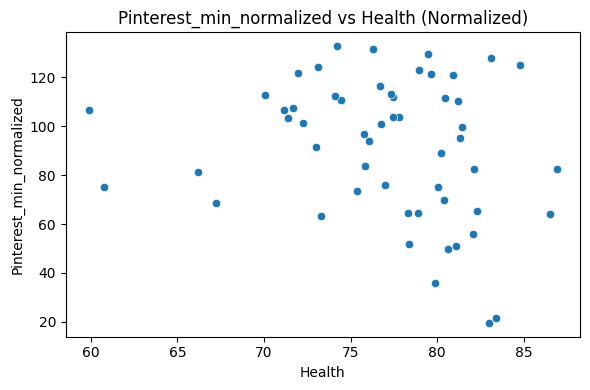

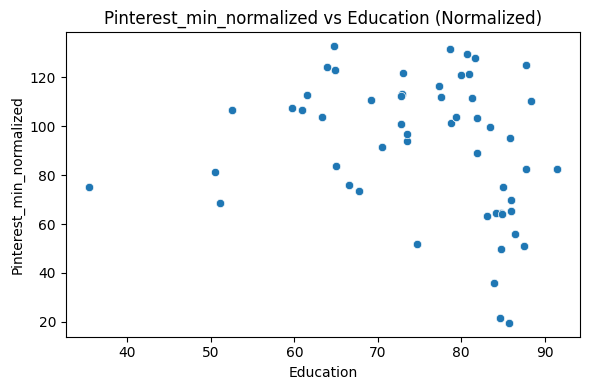

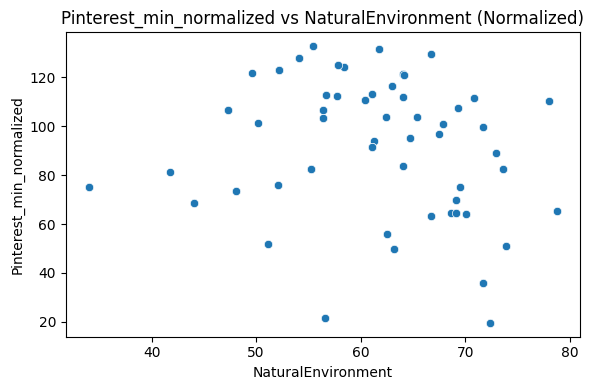

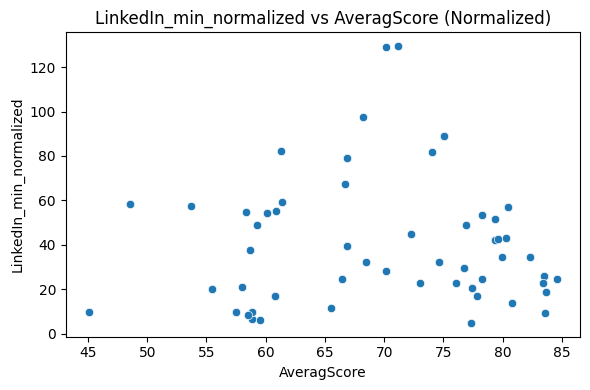

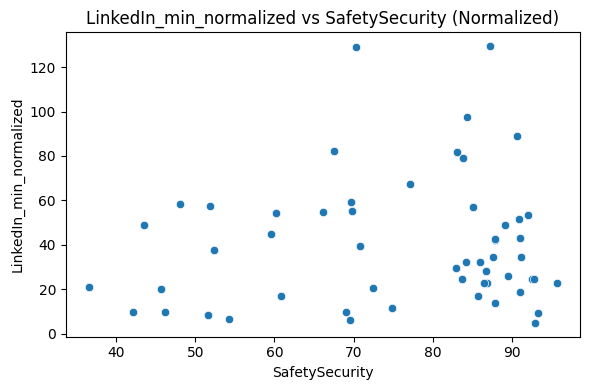

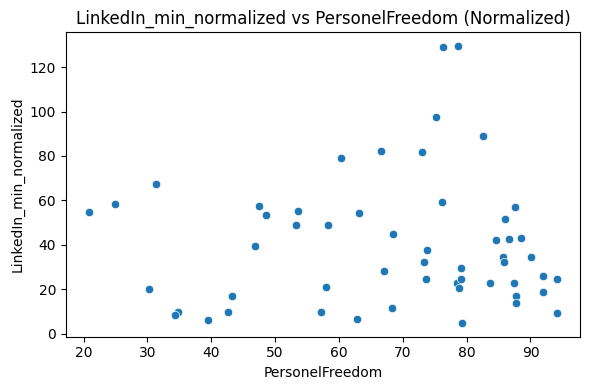

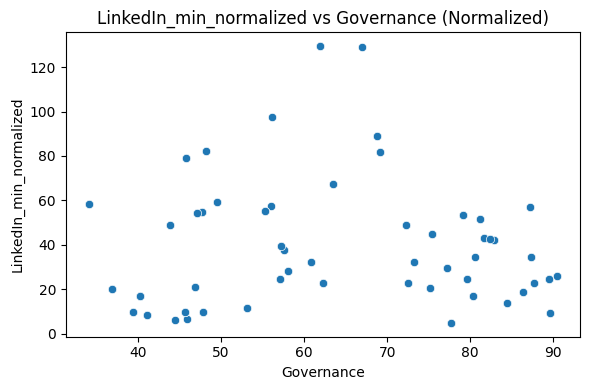

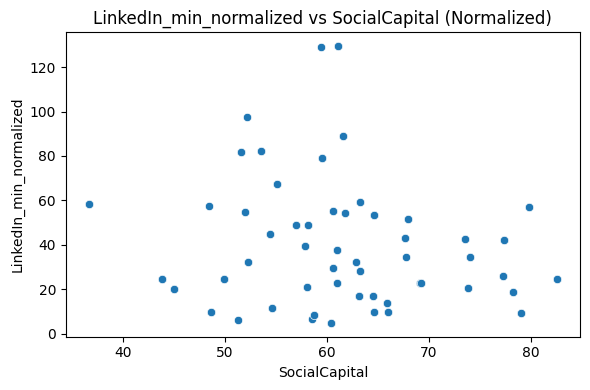

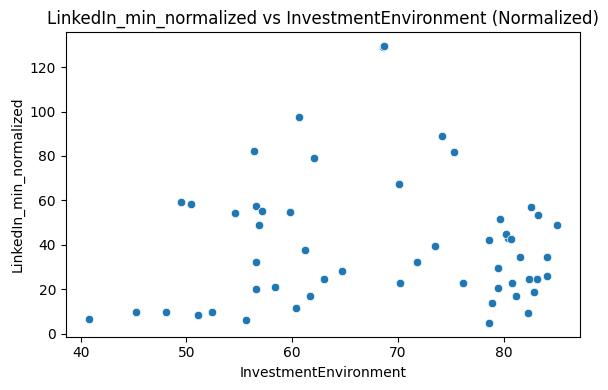

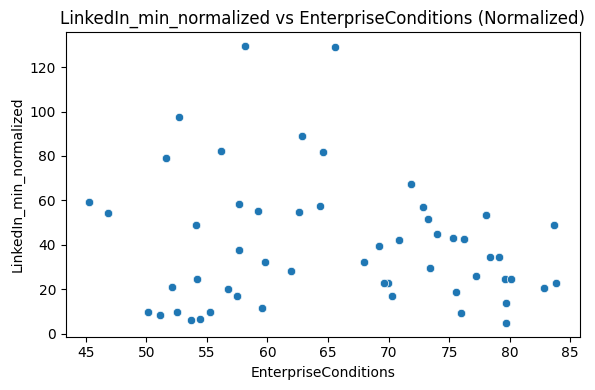

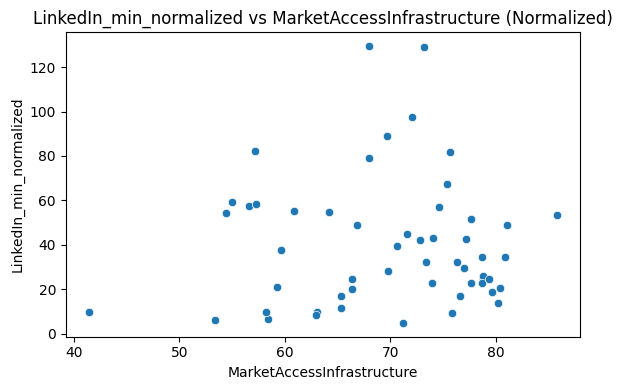

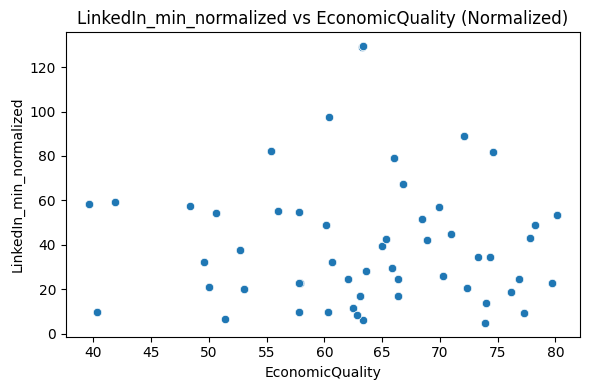

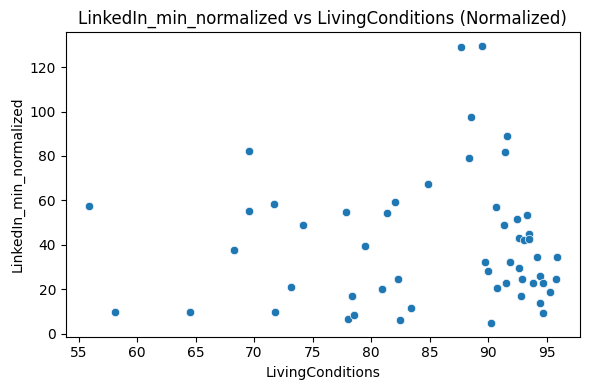

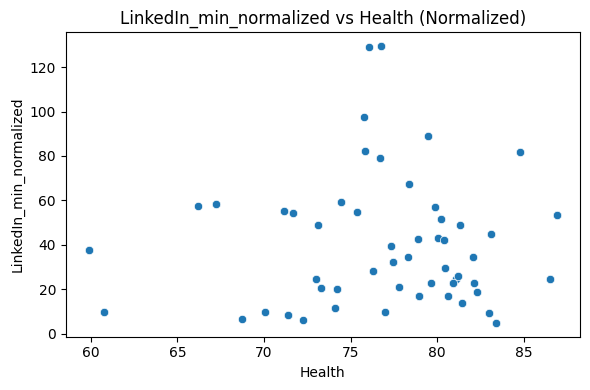

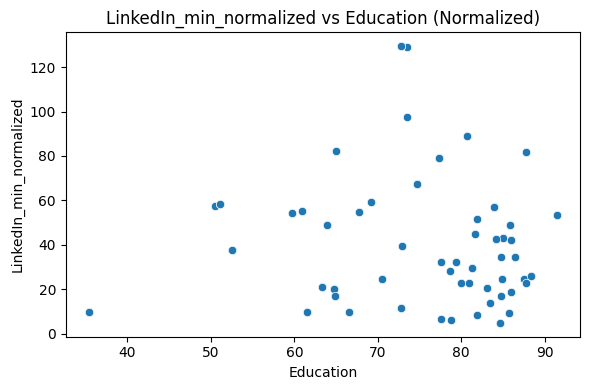

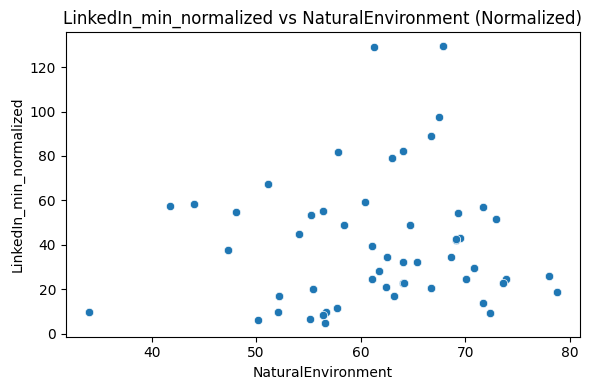

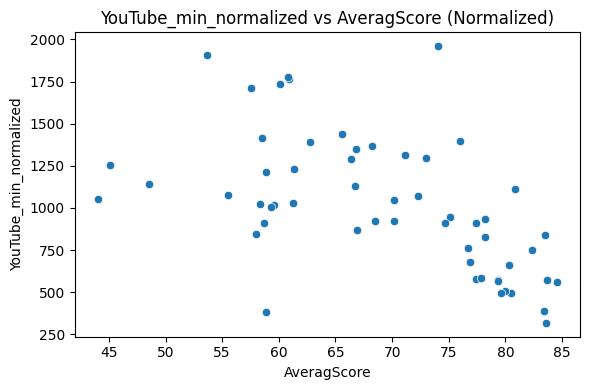

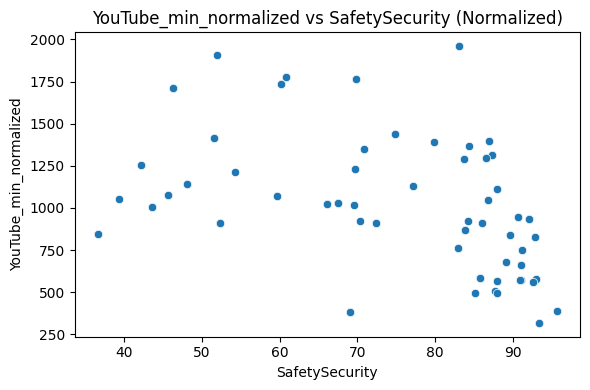

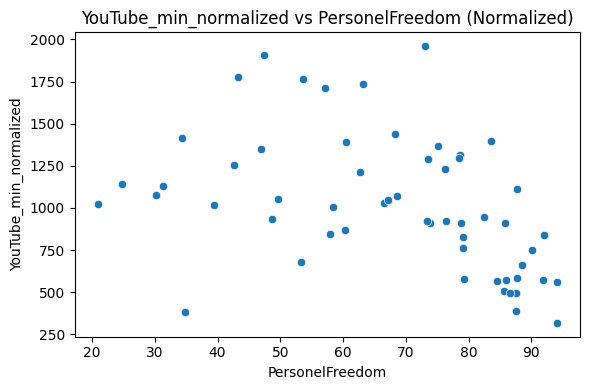

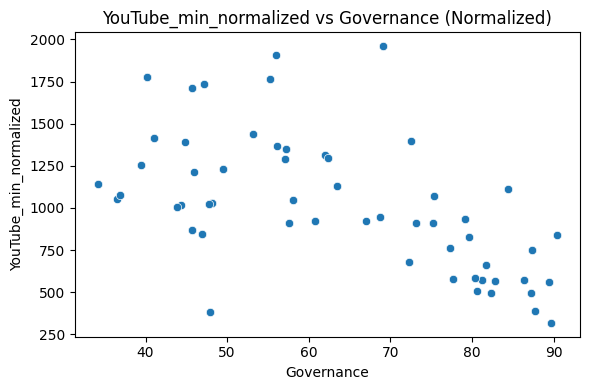

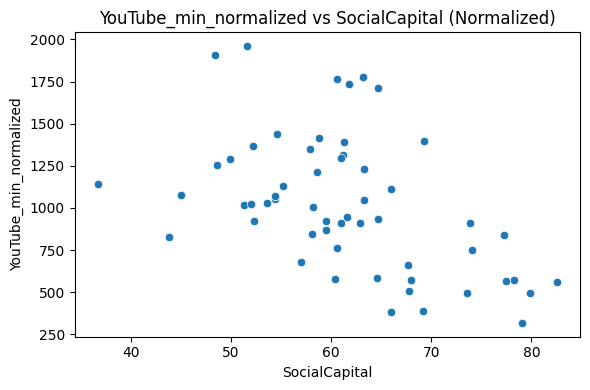

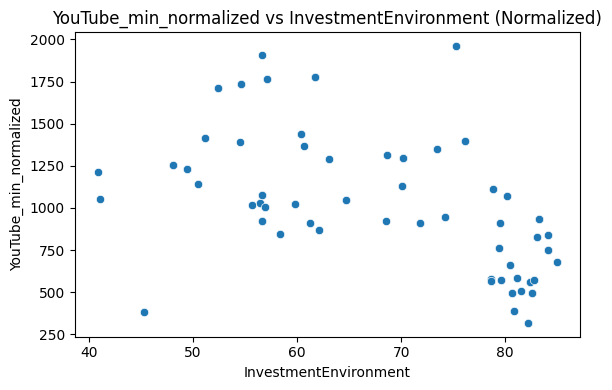

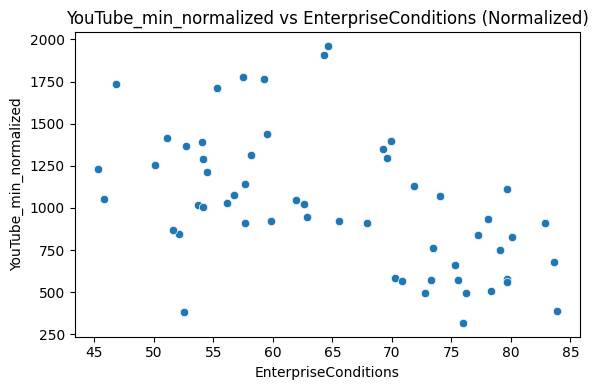

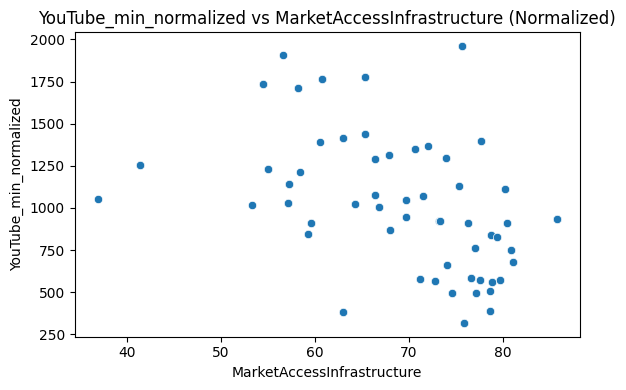

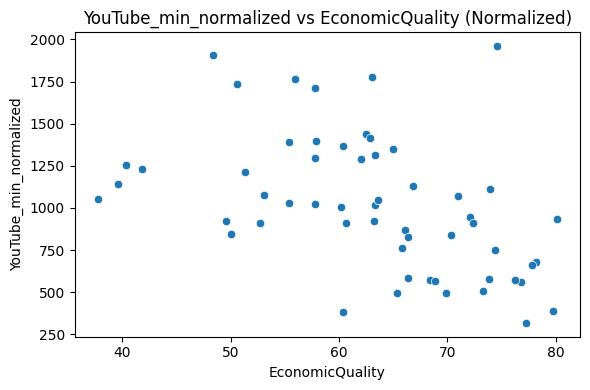

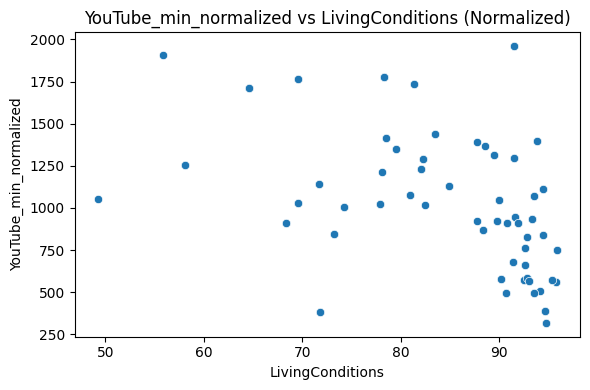

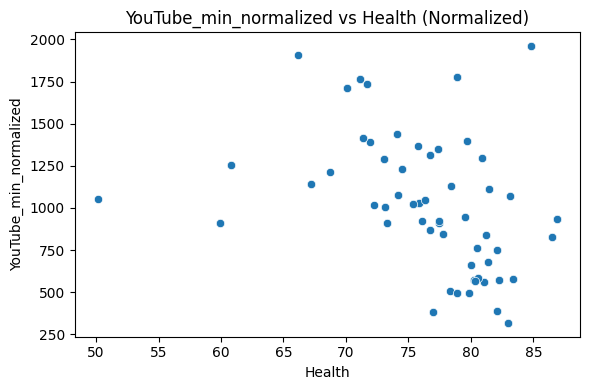

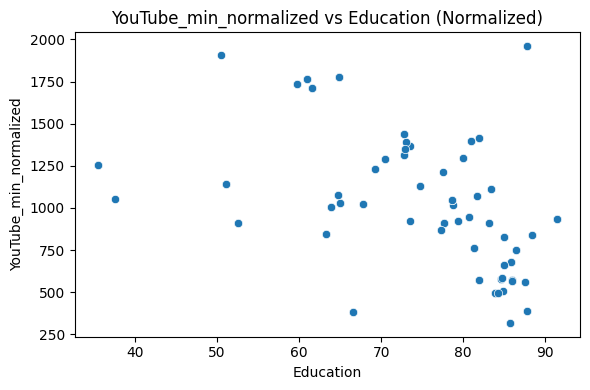

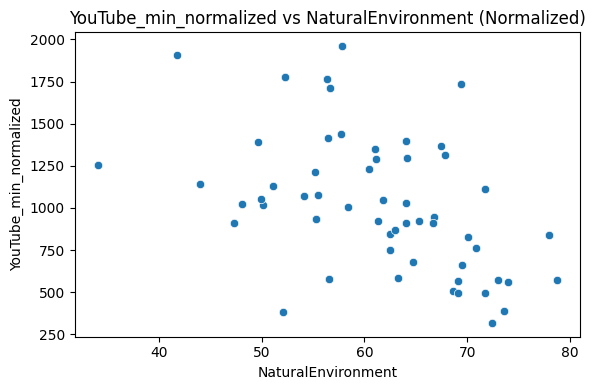


--- Hypothesis Test Results (Normalized) ---
    Social_Media_Normalized                 Development  Pearson_Corr  \
6     TikTok_min_normalized        EnterpriseConditions     -0.704189   
3     TikTok_min_normalized                  Governance     -0.662503   
5     TikTok_min_normalized       InvestmentEnvironment     -0.660477   
8     TikTok_min_normalized             EconomicQuality     -0.658367   
0     TikTok_min_normalized                 AveragScore     -0.643033   
..                      ...                         ...           ...   
60  LinkedIn_min_normalized             EconomicQuality     -0.018723   
52  LinkedIn_min_normalized                 AveragScore     -0.014635   
57  LinkedIn_min_normalized       InvestmentEnvironment      0.012863   
54  LinkedIn_min_normalized             PersonelFreedom     -0.009172   
59  LinkedIn_min_normalized  MarketAccessInfrastructure      0.002759   

       Pearson_p  Spearman_Corr    Spearman_p  
6   3.291027e-18      -0.6973

In [ ]:
# --- NORMALIZED ANALYSIS ---

normalized_cols = [c for c in df.columns if c.endswith("_normalized")]

print("\nNormalized columns:", normalized_cols)


# 1) Summary statistics
print("\n--- SUMMARY STATISTICS (Normalized) ---")
print(df[normalized_cols + list(development_cols)].describe())


# 2) Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[normalized_cols + list(development_cols)].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Normalized Social Media vs Development)")
plt.show()


# 3) Scatterplots
for soc in normalized_cols:
    for devcol in development_cols:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=devcol, y=soc)
        plt.title(f"{soc} vs {devcol} (Normalized)")
        plt.xlabel(devcol)
        plt.ylabel(soc)
        plt.tight_layout()
        plt.show()


# 4) Hypothesis Testing
results_norm = []

for soc in normalized_cols:
    for devcol in development_cols:

        clean = df[[soc, devcol]].dropna()
        if len(clean) > 5:

            pear_corr, pear_p = pearsonr(clean[soc], clean[devcol])
            spear_corr, spear_p = spearmanr(clean[soc], clean[devcol])

            results_norm.append({
                "Social_Media_Normalized": soc,
                "Development": devcol,
                "Pearson_Corr": pear_corr,
                "Pearson_p": pear_p,
                "Spearman_Corr": spear_corr,
                "Spearman_p": spear_p
            })

results_norm_df = pd.DataFrame(results_norm)
print("\n--- Hypothesis Test Results (Normalized) ---")
print(results_norm_df.sort_values("Pearson_p"))


# 5) Significant normalized relationships
significant_norm = results_norm_df[
    (results_norm_df["Pearson_p"] < 0.05) | (results_norm_df["Spearman_p"] < 0.05)
]

print("\n--- SIGNIFICANT RELATIONSHIPS (Normalized, p < 0.05) ---")
print(significant_norm)


Sosyal medya sütunları: ['TikTok_min', 'X_min', 'Instagram_min', 'Pinterest_min', 'LinkedIn_min', 'YouTube_min']
Development indicators: ['AveragScore', 'SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']
Empty DataFrame
Columns: [Country_x, Country_Code, TikTok_min, X_min, Instagram_min, Pinterest_min, LinkedIn_min, YouTube_min, Country_y, Android, Country, AveragScore, SafetySecurity, PersonelFreedom, Governance, SocialCapital, InvestmentEnvironment, EnterpriseConditions, MarketAccessInfrastructure, EconomicQuality, LivingConditions, Health, Education, NaturalEnvironment]
Index: []

[0 rows x 24 columns]
⚠ Worldwide not found or empty for TikTok_min, skipping Z-score.
⚠ Worldwide not found or empty for X_min, skipping Z-score.
⚠ Worldwide not found or empty for Instagram_min, skipping Z-score.
⚠ Worldwide no

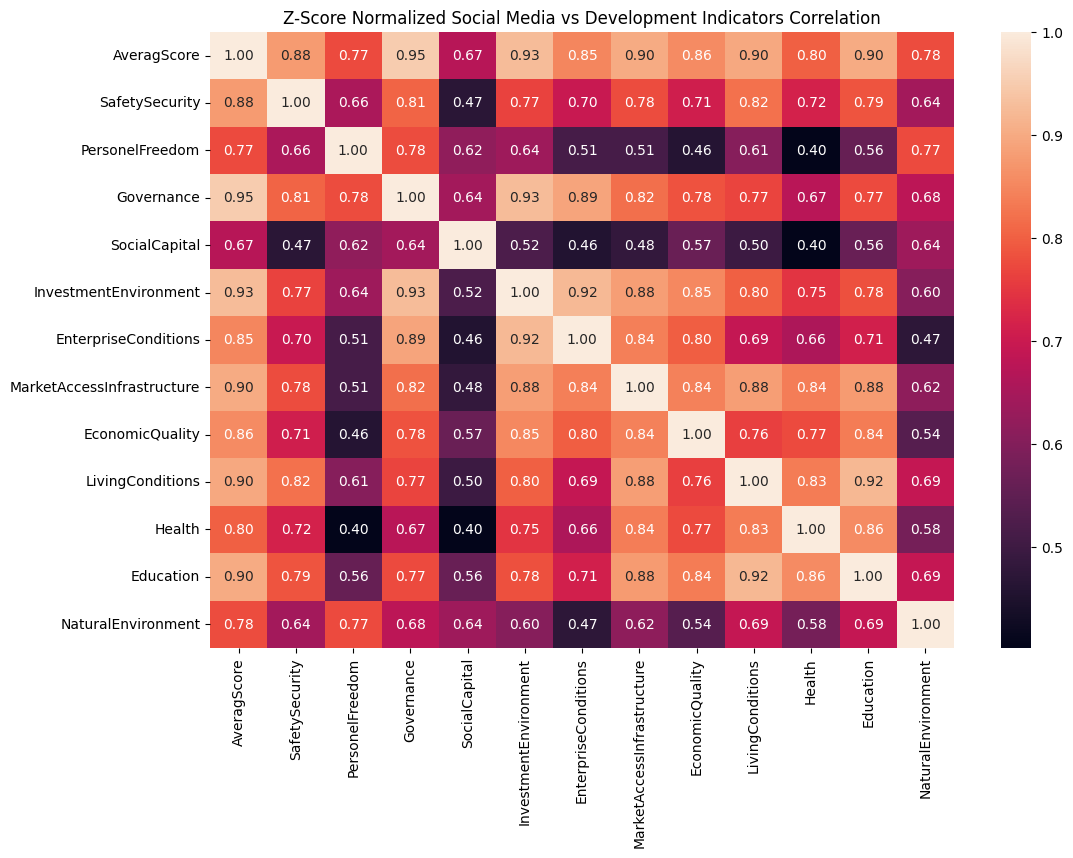


--- Hypothesis Test Results (Z-score Normalized) ---


KeyError: 'Pearson_p'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load data
monthly = pd.read_csv("monthly_time_spend_by_country.csv")
android = pd.read_csv("android_phone_use_by_country.csv")
dev = pd.read_csv("development_country.csv")

# Clean Country_Code
for df_ in [monthly, android, dev]:
    df_["Country_Code"] = df_["Country_Code"].astype(str).str.strip()

# Merge into one dataframe
df = monthly.merge(android, on="Country_Code", how="left")
df = df.merge(dev, on="Country_Code", how="left")

df.replace("-", np.nan, inplace=True)

# Social media columns (except Country and Country_Code)
social_cols = [c for c in monthly.columns if c not in ["Country", "Country_Code"]]

# Development columns
development_cols = dev.columns.drop(["Country", "Country_Code"], errors="ignore")

print("Sosyal medya sütunları:", social_cols)
print("Development indicators:", list(development_cols))



print(df[df["Country"].str.contains("world", case=False, na=False)])
# ------------------------------
#     Z-SCORE NORMALIZATION
# ------------------------------

df_z = df.copy()   # Z-score kolonlarını burada tutacağız

for col in social_cols:

    # Worldwide satırını seç
    worldwide_value = df.loc[df["Country"] == "Worldwide", col]

    if worldwide_value.empty or pd.isna(worldwide_value.values[0]):
        print(f"⚠ Worldwide not found or empty for {col}, skipping Z-score.")
        continue

    world_mean = float(worldwide_value.values[0])

    # Sample std sadece gerçek ülkeler arasında hesaplanır (Worldwide dahil edilmez)
    country_values = df.loc[df["Country"] != "Worldwide", col].astype(float)
    std_val = np.nanstd(country_values)

    if std_val == 0:
        print(f"⚠ Standard deviation = 0 for {col}, cannot compute z-score.")
        continue

    # Z-score formülü
    df_z[col + "_zscore"] = (df[col].astype(float) - world_mean) / std_val

print("\nZ-score normalizasyonu tamamlandı.")
print(df_z[[c for c in df_z.columns if c.endswith("_zscore")]].head())

zscore_cols = [c for c in df_z.columns if c.endswith("_zscore")]

# ------------------------------
#   CORRELATION HEATMAP (Z-SCORE)
# ------------------------------

plt.figure(figsize=(12, 8))
sns.heatmap(df_z[zscore_cols + list(development_cols)].corr(), annot=True, fmt=".2f")
plt.title("Z-Score Normalized Social Media vs Development Indicators Correlation")
plt.show()

# ------------------------------
#   HYPOTHESIS TESTING (Z-SCORE)
# ------------------------------

results = []

for soc in zscore_cols:
    for devcol in development_cols:

        clean = df_z[[soc, devcol]].dropna()

        if len(clean) > 5:
            pear_corr, pear_p = pearsonr(clean[soc], clean[devcol])
            spear_corr, spear_p = spearmanr(clean[soc], clean[devcol])

            results.append({
                "SocialMedia_Z": soc,
                "Development": devcol,
                "Pearson_Corr": pear_corr,
                "Pearson_p": pear_p,
                "Spearman_Corr": spear_corr,
                "Spearman_p": spear_p
            })

results_df = pd.DataFrame(results)

print("\n--- Hypothesis Test Results (Z-score Normalized) ---")
print(results_df.sort_values("Pearson_p"))

# Significant results
significant = results_df[
    (results_df["Pearson_p"] < 0.05) | (results_df["Spearman_p"] < 0.05)
]

print("\n--- SIGNIFICANT RELATIONSHIPS (p < 0.05) ---")
print(significant)


⚠ Worldwide disappeared during merge — restoring it.
    Country_x Country_Code  TikTok_min X_min Instagram_min Pinterest_min  \
114       NaN           WW        2206   340           936           191   

    LinkedIn_min YouTube_min Country_y  Android  ... Governance  \
114           27        1780       NaN      NaN  ...        NaN   

     SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
114            NaN                    NaN                   NaN   

     MarketAccessInfrastructure  EconomicQuality  LivingConditions  Health  \
114                         NaN              NaN               NaN     NaN   

     Education  NaturalEnvironment  
114        NaN                 NaN  

[1 rows x 24 columns]
Sosyal medya sütunları: ['TikTok_min', 'X_min', 'Instagram_min', 'Pinterest_min', 'LinkedIn_min', 'YouTube_min']
Development indicators: ['AveragScore', 'SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions', 

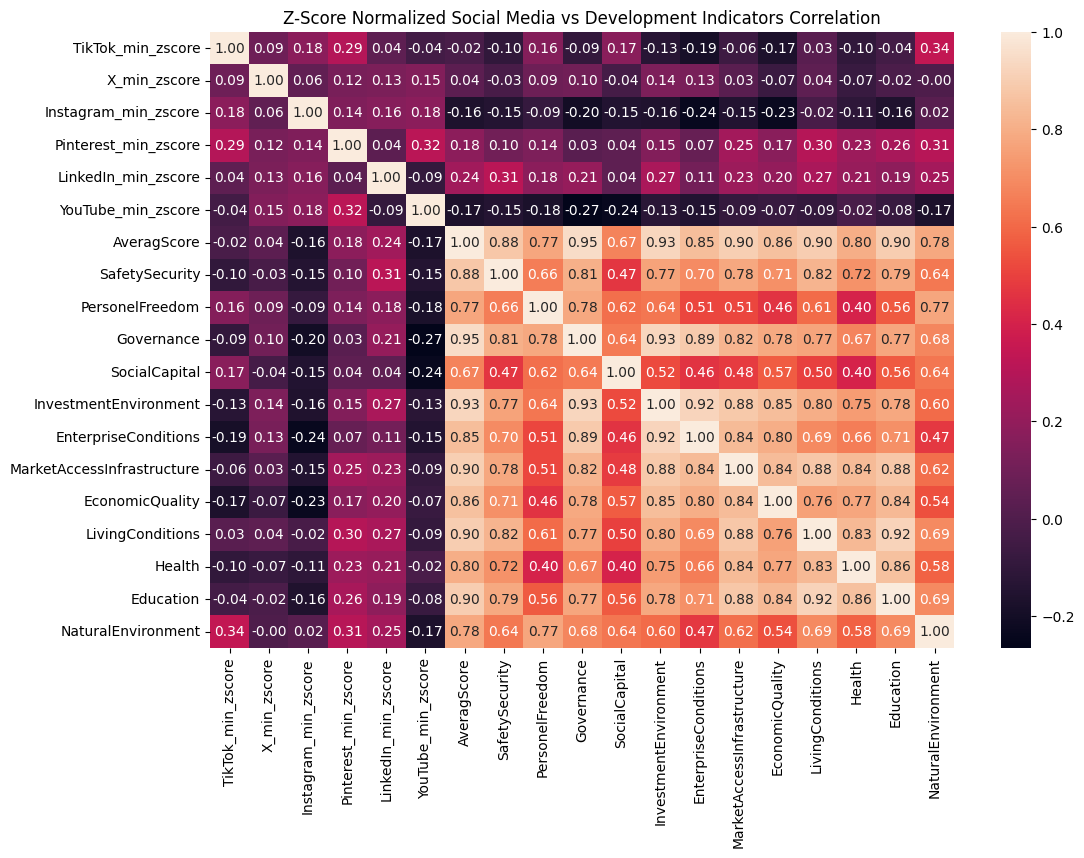


--- Hypothesis Test Results (Z-score Normalized) ---
           SocialMedia_Z         Development  Pearson_Corr  Pearson_p  \
12     TikTok_min_zscore  NaturalEnvironment      0.342322   0.000206   
53   LinkedIn_min_zscore      SafetySecurity      0.313084   0.001212   
51  Pinterest_min_zscore  NaturalEnvironment      0.307564   0.001493   
48  Pinterest_min_zscore    LivingConditions      0.299391   0.002019   
68    YouTube_min_zscore          Governance     -0.265316   0.005984   
..                   ...                 ...           ...        ...   
35  Instagram_min_zscore    LivingConditions     -0.023461   0.811327   
0      TikTok_min_zscore         AveragScore     -0.019354   0.838768   
75    YouTube_min_zscore              Health     -0.019813   0.840241   
24          X_min_zscore           Education     -0.015876   0.872296   
25          X_min_zscore  NaturalEnvironment     -0.004787   0.961343   

    Spearman_Corr  Spearman_p  
12       0.204738    0.029608  
53   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load data
monthly = pd.read_csv("monthly_time_spend_by_country.csv")
android = pd.read_csv("android_phone_use_by_country.csv")
dev = pd.read_csv("development_country.csv")

# Clean Country_Code
for df_ in [monthly, android, dev]:
    df_["Country_Code"] = df_["Country_Code"].astype(str).str.strip()

# Merge datasets
df = monthly.merge(android, on="Country_Code", how="left")
df = df.merge(dev, on="Country_Code", how="left")
df.replace("-", np.nan, inplace=True)


# Chech if worldwide got lost during merge
monthly_worldwide = monthly[monthly["Country"].str.lower() == "worldwide"]
merged_worldwide = df[df["Country"].str.lower() == "worldwide"]

if merged_worldwide.empty and not monthly_worldwide.empty:
    print("⚠ Worldwide disappeared during merge — restoring it.")

    # Row of Worldwide
    w_row = monthly_worldwide.copy()

    # Set android and development scores as None
    for col in df.columns:
        if col not in w_row.columns:
            w_row[col] = np.nan

    # Add column to the data frame
    w_row = w_row[df.columns]
    df = pd.concat([df, w_row], ignore_index=True)

else:
    print("✔ Worldwide found in merged dataframe.")



social_cols = [c for c in monthly.columns if c not in ["Country", "Country_Code"]]
development_cols = dev.columns.drop(["Country", "Country_Code"], errors="ignore")

print("Social media platforms: ", social_cols)
print("Development indicators:", list(development_cols))

# Z score normalization
# The datasets have data for the top 50 most used countries
# It can create a bias
# That's why a comparison with worldwide data is made

df_z = df.copy()

for col in social_cols:

    worldwide_value = df.loc[df["Country"] == "Worldwide", col]

    world_mean = float(worldwide_value.values[0])

    country_values = df.loc[df["Country"] != "Worldwide", col].astype(float)
    std_val = np.nanstd(country_values)

    if std_val == 0:
        print(f"⚠ Standard deviation = 0 for {col}, cannot compute z-score.")
        continue

    df_z[col + "_zscore"] = (df[col].astype(float) - world_mean) / std_val

print("\nZ-score normalizasyonu tamamlandı.")
print(df_z[[c for c in df_z.columns if c.endswith("_zscore")]].head())

zscore_cols = [c for c in df_z.columns if c.endswith("_zscore")]


# Correalation Heatmap (z-score)


plt.figure(figsize=(12, 8))
sns.heatmap(df_z[zscore_cols + list(development_cols)].corr(), annot=True, fmt=".2f")
plt.title("Z-Score Normalized Social Media vs Development Indicators Correlation")
plt.show()


# Hypothesis Testing (z-score)


results = []

for soc in zscore_cols:
    for devcol in development_cols:

        clean = df_z[[soc, devcol]].dropna()

        if len(clean) > 5:
            pear_corr, pear_p = pearsonr(clean[soc], clean[devcol])
            spear_corr, spear_p = spearmanr(clean[soc], clean[devcol])

            results.append({
                "SocialMedia_Z": soc,
                "Development": devcol,
                "Pearson_Corr": pear_corr,
                "Pearson_p": pear_p,
                "Spearman_Corr": spear_corr,
                "Spearman_p": spear_p
            })

results_df = pd.DataFrame(results)

print("\n--- Hypothesis Test Results (Z-score Normalized) ---")
print(results_df.sort_values("Pearson_p"))

significant = results_df[
    (results_df["Pearson_p"] < 0.05) | (results_df["Spearman_p"] < 0.05)
]

print("\n--- SIGNIFICANT RELATIONSHIPS (p < 0.05) ---")
print(significant)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# --------- DOSYA YOLLARI (kendi yoluna göre düzenle) ----------
MONTHLY = "/mnt/data/monthly_time_spend_by_country - monthly_time_spend_by_country.csv"
ANDROID = "/mnt/data/android_phone_use_by_country - android_phone_use_by_country.csv"
DEV     = "/mnt/data/development_country - Sayfa1.csv"

# --------- 1) VERİLERİ OKU ----------
monthly = pd.read_csv(MONTHLY)
android = pd.read_csv(ANDROID)
dev = pd.read_csv(DEV)

# --------- 2) COUNTRY_CODE sütununu normalize et (ikinci sütun adı farklı olabilir) ----------
def find_code_col(df):
    # yaygın isimlere bak, yoksa ikinci sütun
    for name in ["Country_Code","CountryCode","country_code","Code","ISO"]:
        if name in df.columns:
            return name
    return df.columns[1]

m_code = find_code_col(monthly)
a_code = find_code_col(android)
d_code = find_code_col(dev)

monthly = monthly.rename(columns={m_code: "Country_Code"})
android = android.rename(columns={a_code: "Country_Code"})
dev = dev.rename(columns={d_code: "Country_Code"})

for df in (monthly, android, dev):
    df["Country_Code"] = df["Country_Code"].astype(str).str.strip()

# --------- 3) Basit temizlik: placeholder -> NaN ----------
placeholders = ["-", "--", "", " ", "NA", "N/A", "na"]
monthly = monthly.replace(placeholders, np.nan)
android  = android.replace(placeholders, np.nan)
dev      = dev.replace(placeholders, np.nan)

# --------- 4) Merge (Country_Code üzerinden, monthly'i koru) ----------
df = monthly.merge(android, on="Country_Code", how="left", suffixes=("","_android"))
df = df.merge(dev, on="Country_Code", how="left", suffixes=("","_dev"))

# --------- 5) Platform listesi ve development göstergeleri (senin isteğe göre) ----------
# Platform sütun adları örneği: 'Instagram_min','X_min','TikTok_min','LinkedIn_min','Pinterest_min'
platforms = ["Instagram_min", "X_min", "TikTok_min", "LinkedIn_min", "Pinterest_min"]

# Gelişmişlik göstergeleri (isteğine göre tam liste)
dev_indicators = [
    "SafetySecurity","PersonelFreedom","Governance","SocialCapital",
    "InvestmentEnvironment","EnterpriseConditions","MarketAccessInfrastructure",
    "EconomicQuality","LivingConditions","Health","Education","NaturalEnvironment"
]

# Eğer dev dosyasında bu isimlerden bazıları yoksa, mevcut olanları kullan
dev_indicators = [c for c in dev_indicators if c in df.columns]

# --------- 6) Numeric dönüşümler (güvenli) ----------
# Android rate kolonu varsa otomatik bul (android dosyasındaki ilk uygun sütun)
android_rate_col = None
cand = [c for c in android.columns if c != "Country_Code"]
for c in cand:
    if "android" in c.lower() or "rate" in c.lower() or "penetr" in c.lower():
        android_rate_col = c
        break
if android_rate_col is None and len(cand) > 0:
    android_rate_col = cand[0]

# numeric dönüşümler
if android_rate_col is not None:
    df[android_rate_col] = pd.to_numeric(df[android_rate_col].astype(str).str.replace("%","", regex=False).str.replace(",","."),
                                         errors="coerce")

# platformları ve dev göstergelerini numeric'e çevir
for col in platforms:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(",",".").str.strip(), errors="coerce")

for col in dev_indicators:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",",".").str.strip(), errors="coerce")

# --------- 7) Normalizasyon: eğer android_rate_col varsa kullan, yoksa ham değer kullan ----------
use_normalized = False
if android_rate_col is not None:
    # normalize edeceğiz ve yeni sütun <platform>_norm oluşturulacak
    use_normalized = True
    for col in platforms:
        if col in df.columns:
            df[col + "_norm"] = df[col] * df[android_rate_col] / 100.0
else:
    # normalized sütun yoksa _norm olarak kopya kaydet (tek tip kullanım için)
    for col in platforms:
        if col in df.columns:
            df[col + "_norm"] = df[col]

# --------- 8) Korelasyon hesaplama (her platform x her dev indicator) ----------
MIN_N = 5  # yeterli örnek sayısı eşiği

print("Platform - Development Indicator korelasyonları (Pearson & Spearman)")
print("Not: n < {} olan eşleşmeler atlanır\n".format(MIN_N))

for plat in platforms:
    norm_col = plat + "_norm"
    if norm_col not in df.columns:
        print(f"{plat}: sütun bulunamadı, atlanıyor.")
        continue

    # sadece o platform için veri olan ülkelerle çalış
    sub = df[["Country_Code", norm_col] + dev_indicators].dropna(subset=[norm_col])
    n_total = sub.shape[0]
    if n_total < MIN_N:
        print(f"{plat}: Yeterli ülke yok (n={n_total}), atlanıyor.")
        continue

    print(f"\n=== {plat} (n={n_total}) ===")
    for dev_col in dev_indicators:
        clean = sub[[norm_col, dev_col]].dropna()
        n = clean.shape[0]
        if n < MIN_N:
            print(f"  {dev_col}: n={n} (yetersiz), atlanıyor")
            continue
        x = clean[norm_col].values
        y = clean[dev_col].values

        # Pearson
        try:
            pear_r, pear_p = pearsonr(x, y)
        except Exception:
            pear_r, pear_p = (np.nan, np.nan)
        # Spearman
        try:
            spear_r, spear_p = spearmanr(x, y)
        except Exception:
            spear_r, spear_p = (np.nan, np.nan)

        print(f"  {dev_col}: n={n} | Pearson r={pear_r:.3f}, p={pear_p:.4g} | Spearman ρ={spear_r:.3f}, p={spear_p:.4g}")

# --------- BİTTİ ----------
print("\nTüm korelasyon hesaplamaları tamamlandı.")
